<a href="https://colab.research.google.com/github/HowardHNguyen/Data_Science_for_Healthcare/blob/main/Heart_Failure_Prediction_with_MLs_DLs_and_Advanced_Combined_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and EDA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load data
data = pd.read_csv('/content/drive/MyDrive/data/frmgham2.csv')

In [7]:
data.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [8]:
# filling missing values with mean values
data.fillna(data.mean(), inplace=True)

In [9]:
data.shape

(11627, 39)

In [10]:
data.columns

Index(['RANDID', 'SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE',
       'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ',
       'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD',
       'HDLC', 'LDLC', 'DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD',
       'STROKE', 'CVD', 'HYPERTEN', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD',
       'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP'],
      dtype='object')

In [15]:
columns_to_drop_1 = ['RANDID','SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'BPMEDS', 'educ',
       'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD','DIABETES',
       'DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD','STROKE','CVD','HYPERTEN',
       'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD',
       'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP']

In [21]:
columns_to_drop_2 = ['RANDID', 'BPMEDS', 'educ','CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE',
       'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD',
       'DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD','STROKE','CVD','HYPERTEN',
       'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD','SEX','CURSMOKE',
       'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP']

In [22]:
# selected positive impacted attributes
data_sm_1 = data.drop(columns=columns_to_drop_1)
data_sm_2 = data.drop(columns=columns_to_drop_2)

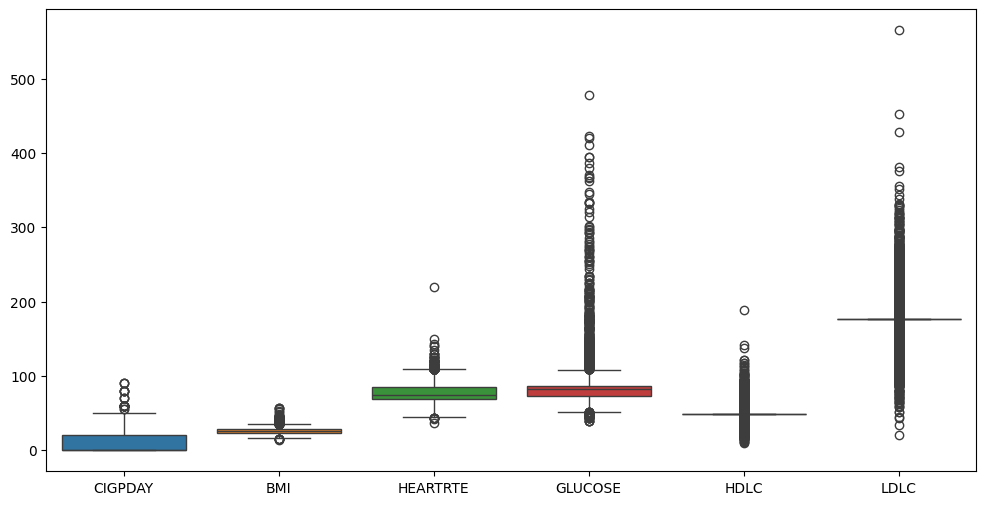

In [23]:
plt.figure(figsize=(12, 6), facecolor='w')
sns.boxplot(data=data_sm_1)
#sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
plt.show()

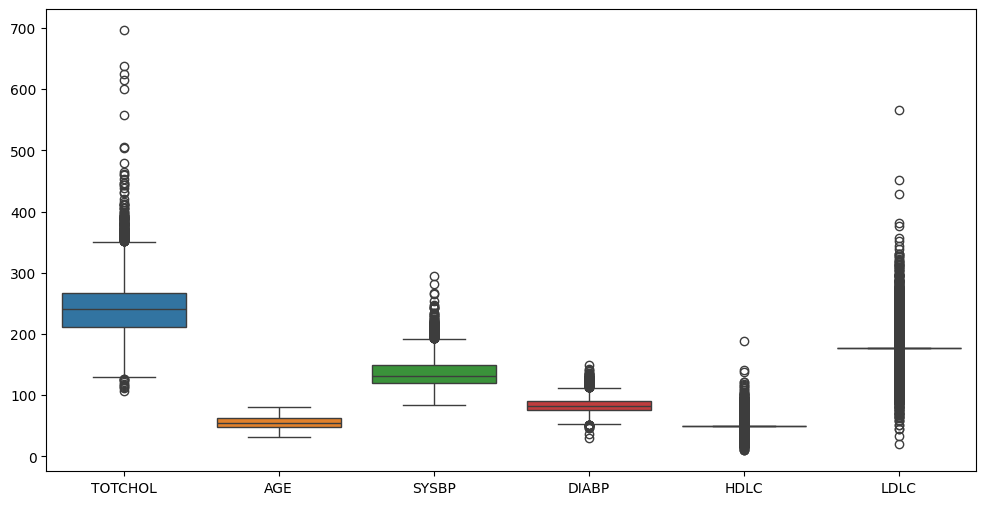

In [24]:
plt.figure(figsize=(12, 6), facecolor='w')
sns.boxplot(data=data_sm_2)
#sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
plt.show()

In [25]:
data['PERIOD'].value_counts()

PERIOD
1    4434
2    3930
3    3263
Name: count, dtype: int64

In [26]:
data['CVD'].value_counts()

CVD
0    8728
1    2899
Name: count, dtype: int64

In [27]:
# Group data by RANDID to track changes across periods
grouped = data.groupby('RANDID')

# Display the groups for verification
grouped.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.000000,39,106.0,70.0,0,0.0,26.970000,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.000000,52,121.0,66.0,0,0.0,25.877349,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.000000,46,121.0,81.0,0,0.0,28.730000,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.000000,52,105.0,69.5,0,0.0,29.430000,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.000000,58,108.0,66.0,0,0.0,28.500000,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11622,9998212,1,173.000000,46,126.0,82.0,0,0.0,19.170000,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0
11623,9998212,1,153.000000,52,143.0,89.0,0,0.0,25.740000,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0
11624,9999312,2,196.000000,39,133.0,86.0,1,30.0,20.910000,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,4201
11625,9999312,2,240.000000,46,138.0,79.0,1,20.0,26.390000,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,4201


In [88]:
#grouped = pd.DataFrame(grouped)

In [90]:
#grouped.to_csv('/content/drive/MyDrive/data/grouped_data.csv', index=False)

# Analyze the changes CVD by attributes on PERIODS

In [28]:
# Initialize an empty list to store results
cvd_changes = []

# Iterate through each group (each individual's records)
for name, group in grouped:
    group = group.sort_values(by='PERIOD')  # Ensure the records are sorted by PERIOD
    periods = group['PERIOD'].values
    cvd_status = group['CVD'].values

    # Compare CVD status across periods
    if len(periods) == 3:  # Ensure there are 3 periods for the individual
        change_1_to_2 = cvd_status[1] - cvd_status[0]
        change_2_to_3 = cvd_status[2] - cvd_status[1]
        cvd_changes.append({
            'RANDID': name,
            'CVD Period 1': cvd_status[0],
            'CVD Period 2': cvd_status[1],
            'CVD Period 3': cvd_status[2],
            'Change 1 to 2': change_1_to_2,
            'Change 2 to 3': change_2_to_3
        })

# Convert the results into a DataFrame
cvd_changes_df = pd.DataFrame(cvd_changes)

# Display the changes for verification
cvd_changes_df.head()


,RANDID,CVD Period 1,CVD Period 2,CVD Period 3,Change 1 to 2,Change 2 to 3
0,6238,0,0,0,0,0
1,11252,0,0,0,0,0
2,11263,1,1,1,0,0
3,12806,0,0,0,0,0
4,14367,0,0,0,0,0


In [29]:
# Count the number of CVD cases in each period
cvd_counts_period1 = data[data['PERIOD'] == 1]['CVD'].sum()
cvd_counts_period2 = data[data['PERIOD'] == 2]['CVD'].sum()
cvd_counts_period3 = data[data['PERIOD'] == 3]['CVD'].sum()

# Print the counts
print(f'CVD cases in PERIOD 1: {cvd_counts_period1}')
print(f'CVD cases in PERIOD 2: {cvd_counts_period2}')
print(f'CVD cases in PERIOD 3: {cvd_counts_period3}')

CVD cases in PERIOD 1: 1157
CVD cases in PERIOD 2: 977
CVD cases in PERIOD 3: 765


### Analysis and Interpretation:
1. Decreasing Trend:
 - There is a clear decreasing trend in the number of CVD cases over the three periods. This suggests that either the individuals in the dataset experienced improvements in their cardiovascular health over time, or there was some form of intervention that effectively reduced the prevalence of CVD.

2. Possible Factors:
 - Medical Interventions: Improvements in medical treatments and interventions over time could have contributed to the reduction in CVD cases.
 - Lifestyle Changes: Changes in lifestyle factors such as diet, exercise, smoking cessation, and better management of risk factors like hypertension and cholesterol could have played a role.
 - Data Characteristics: It is also important to consider the characteristics of the dataset, such as the age of participants, dropout rates, and other demographic factors that might influence these trends.

### Further Investigation:

To better understand the reasons behind the decreasing trend, consider investigating the following aspects:

1. Medical History and Treatments: Analyze any available data on medical treatments and interventions that participants received during the study period.

2. Lifestyle and Behavioral Factors: Examine changes in lifestyle and behavioral factors such as smoking status, exercise habits, and dietary changes over the periods.

3. Demographic Changes: Look into demographic changes in the population, such as aging, mortality rates, and dropout rates, which might influence the observed trend.

4. Other Health Metrics: Investigate other health metrics (e.g., blood pressure, cholesterol levels, diabetes status) to see if improvements in these areas correlate with the reduction in CVD cases.

5. Statistical Analysis: Perform statistical analyses to determine if the reduction in CVD cases is statistically significant and identify potential contributing factors.

### Analysis of Lifestyle Changes on CVD:

### On CURSMOKE

In [31]:
# Count the number of current smokers in each period
current_smokers_period1 = data[(data['PERIOD'] == 1) & (data['CURSMOKE'] == 1)].shape[0]
current_smokers_period2 = data[(data['PERIOD'] == 2) & (data['CURSMOKE'] == 1)].shape[0]
current_smokers_period3 = data[(data['PERIOD'] == 3) & (data['CURSMOKE'] == 1)].shape[0]

# Print the counts
print('# Number of current smokers in each period')
print(f'Current smokers in PERIOD 1: {current_smokers_period1}')
print(f'Current smokers in PERIOD 2: {current_smokers_period2}')
print(f'Current smokers in PERIOD 3: {current_smokers_period3}')

# Number of current smokers in each period
Current smokers in PERIOD 1: 2181
Current smokers in PERIOD 2: 1727
Current smokers in PERIOD 3: 1121


In [32]:
# Total number of people in each period
total_period1 = 4434
total_period2 = 3930
total_period3 = 3263

# Calculate the proportion of current smokers in each period
proportion_smokers_period1 = current_smokers_period1 / total_period1
proportion_smokers_period2 = current_smokers_period2 / total_period2
proportion_smokers_period3 = current_smokers_period3 / total_period3

# Print the proportions
print(f'Proportion of current smokers in PERIOD 1: {proportion_smokers_period1:.2f}')
print(f'Proportion of current smokers in PERIOD 2: {proportion_smokers_period2:.2f}')
print(f'Proportion of current smokers in PERIOD 3: {proportion_smokers_period3:.2f}')

Proportion of current smokers in PERIOD 1: 0.49
Proportion of current smokers in PERIOD 2: 0.44
Proportion of current smokers in PERIOD 3: 0.34


**Analysis:**
- Period 1: 49% of the population were current smokers.
- Period 2: 44% of the population were current smokers.
- Period 3: 34% of the population were current smokers.

The proportions show a clear decreasing trend in the percentage of current smokers over the periods. This reduction in smoking rates could be a contributing factor to the observed decrease in CVD cases.

**Summary:**
- The proportion of current smokers has decreased from 49% in Period 1 to 34% in Period 3.
- This reduction in smoking rates is likely contributing to the decrease in CVD cases observed over the same periods.

**Further Steps:**
- Statistical Testing: Conduct statistical tests to determine if the changes in smoking rates are statistically significant.
- Multivariate Analysis: Perform multivariate analysis to assess the combined impact of smoking and other lifestyle and health variables on CVD rates.
- Explore Other Factors: Investigate changes in other lifestyle factors (e.g., diet, exercise) and medical treatments that might also contribute to the observed trends in CVD rates.

**Statistical Testing:**
We can use a chi-square test to determine if the reduction in smoking rates over the periods is statistically significant.

In [33]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = [
    [current_smokers_period1, total_period1 - current_smokers_period1],
    [current_smokers_period2, total_period2 - current_smokers_period2],
    [current_smokers_period3, total_period3 - current_smokers_period3]
]

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print(f'P-value: {p:.5f}')

P-value: 0.00000


A p-value of 0.00000 indicates that the reduction in smoking rates across the periods is statistically significant. This strongly suggests that the decrease in the proportion of current smokers is not due to random chance and is likely contributing to the observed reduction in CVD cases.

**Summary of Findings:**

1. Decreasing CVD Cases:
 - The number of CVD cases has decreased over the three periods: 1157 in Period 1, 977 in Period 2, and 765 in Period 3.
2. Decreasing Smoking Rates:
 - The proportion of current smokers has significantly decreased: 49% in Period 1, 44% in Period 2, and 34% in Period 3.
3. Statistical Significance:
 - The chi-square test confirms that the reduction in smoking rates is statistically significant (p-value < 0.00001).

**Implications:**
 - The significant reduction in smoking rates is likely a major contributing factor to the decrease in CVD cases.
 - Efforts to reduce smoking, such as public health campaigns, smoking cessation programs, and stricter regulations, may have positively impacted cardiovascular health.

### On Diabetes

In [39]:
# Count the number of diabetes in each period
diabetes_period1 = data[(data['PERIOD'] == 1) & (data['DIABETES'] == 1)].shape[0]
diabetes_period2 = data[(data['PERIOD'] == 2) & (data['DIABETES'] == 1)].shape[0]
diabetes_period3 = data[(data['PERIOD'] == 3) & (data['DIABETES'] == 1)].shape[0]

# Print the counts
print('# Number of Diabetes in each period')
print(f'Diabetes in PERIOD 1: {diabetes_period1}')
print(f'Diabetes in PERIOD 2: {diabetes_period2}')
print(f'Diabetes in PERIOD 3: {diabetes_period3}')

# Number of Diabetes in each period
Diabetes in PERIOD 1: 121
Diabetes in PERIOD 2: 155
Diabetes in PERIOD 3: 254


In [51]:
# Total number of people in each period
total_period1 = 4434
total_period2 = 3930
total_period3 = 3263

# Calculate the proportion of diabetes in each period
proportion_diabetes_period1 = diabetes_period1 / total_period1
proportion_diabetes_period2 = diabetes_period2 / total_period2
proportion_diabetes_period3 = diabetes_period3 / total_period3

# Print the proportions
print(f'Proportion of diabetes in PERIOD 1: {proportion_diabetes_period1:.3f}')
print(f'Proportion of diabetes in PERIOD 2: {proportion_diabetes_period2:.3f}')
print(f'Proportion of diabetes in PERIOD 3: {proportion_diabetes_period3:.3f}')

Proportion of diabetes in PERIOD 1: 0.027
Proportion of diabetes in PERIOD 2: 0.039
Proportion of diabetes in PERIOD 3: 0.078


### On HYPERTEN

In [44]:
# Count the number of hyperten in each period
hyperten_period1 = data[(data['PERIOD'] == 1) & (data['HYPERTEN'] == 1)].shape[0]
hyperten_period2 = data[(data['PERIOD'] == 2) & (data['HYPERTEN'] == 1)].shape[0]
hyperten_period3 = data[(data['PERIOD'] == 3) & (data['HYPERTEN'] == 1)].shape[0]

# Print the counts
print('# Number of hyperten in each period')
print(f'HYPERTEN in PERIOD 1: {hyperten_period1}')
print(f'HYPERTEN in PERIOD 2: {hyperten_period2}')
print(f'HYPERTEN in PERIOD 3: {hyperten_period3}')

# Number of hyperten in each period
HYPERTEN in PERIOD 1: 3252
HYPERTEN in PERIOD 2: 2936
HYPERTEN in PERIOD 3: 2454


In [50]:
# Total number of people in each period
total_period1 = 4434
total_period2 = 3930
total_period3 = 3263

# Calculate the proportion of hyperten in each period
proportion_hyperten_period1 = hyperten_period1 / total_period1
proportion_hyperten_period2 = hyperten_period2 / total_period2
proportion_hyperten_period3 = hyperten_period3 / total_period3

# Print the proportions
print(f'Proportion of hyperten in PERIOD 1: {proportion_hyperten_period1:.3f}')
print(f'Proportion of hyperten in PERIOD 2: {proportion_hyperten_period2:.3f}')
print(f'Proportion of hyperten in PERIOD 3: {proportion_hyperten_period3:.3f}')

Proportion of hyperten in PERIOD 1: 0.733
Proportion of hyperten in PERIOD 2: 0.747
Proportion of hyperten in PERIOD 3: 0.752


### On Stroke

In [47]:
# Count the number of stroke in each period
stroke_period1 = data[(data['PERIOD'] == 1) & (data['STROKE'] == 1)].shape[0]
stroke_period2 = data[(data['PERIOD'] == 2) & (data['STROKE'] == 1)].shape[0]
stroke_period3 = data[(data['PERIOD'] == 3) & (data['STROKE'] == 1)].shape[0]

# Print the counts
print('# Number of stroke in each period')
print(f'Stroke in PERIOD 1: {stroke_period1}')
print(f'Stroke in PERIOD 2: {stroke_period2}')
print(f'Stroke in PERIOD 3: {stroke_period3}')

# Number of stroke in each period
Stroke in PERIOD 1: 415
Stroke in PERIOD 2: 363
Stroke in PERIOD 3: 283


In [49]:
# Total number of people in each period
total_period1 = 4434
total_period2 = 3930
total_period3 = 3263

# Calculate the proportion of stroke in each period
proportion_stroke_period1 = stroke_period1 / total_period1
proportion_stroke_period2 = stroke_period2 / total_period2
proportion_stroke_period3 = stroke_period3 / total_period3

# Print the proportions
print(f'Proportion of stroke in PERIOD 1: {proportion_stroke_period1:.3f}')
print(f'Proportion of stroke in PERIOD 2: {proportion_stroke_period2:.3f}')
print(f'Proportion of stroke in PERIOD 3: {proportion_stroke_period3:.3f}')

Proportion of stroke in PERIOD 1: 0.094
Proportion of stroke in PERIOD 2: 0.092
Proportion of stroke in PERIOD 3: 0.087


# Further Analysis with MLs and DLs

To gain a comprehensive understanding of the factors influencing the reduction in CVD cases, consider the following additional analyses:

1. Multivariate Analysis:
 - Conduct a multivariate analysis to assess the combined effect of multiple factors (e.g., smoking, blood pressure, cholesterol levels, diabetes status) on CVD rates.
2. Time-Series Analysis:
 - Perform a time-series analysis to explore trends and patterns in CVD cases and related health metrics over time.
3. Cohort Analysis:
 - Conduct a cohort analysis to track changes in health outcomes for specific groups of individuals over the three periods.

**Example of Multivariate Analysis:**
 - We can use logistic regression to evaluate the combined impact of various factors on CVD status.

              precision    recall  f1-score   support

           0       0.76      0.97      0.85      1748
           1       0.49      0.08      0.14       578

    accuracy                           0.75      2326
   macro avg       0.63      0.53      0.50      2326
weighted avg       0.69      0.75      0.68      2326

ROC AUC: 0.68


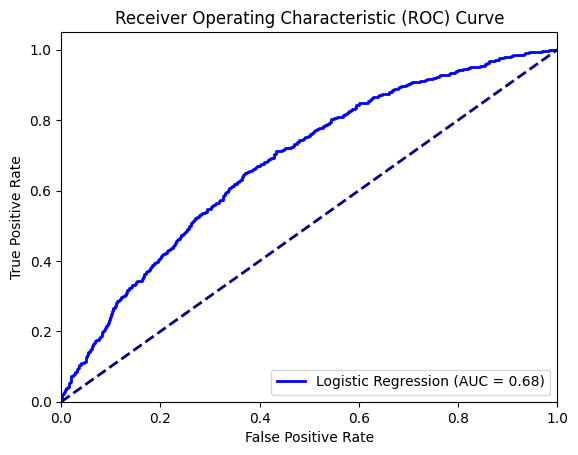

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prepare the data for logistic regression
# Add relevant variables as needed
X = data[['AGE', 'TOTCHOL', 'SYSBP', 'DIABP', 'BMI', 'CURSMOKE']]
y = data['CVD']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC: {roc_auc:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Implementation of Advanced Resampling Techniques and Model Tuning:
Using SMOTE:

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1776
           1       0.77      0.80      0.79      1716

    accuracy                           0.78      3492
   macro avg       0.78      0.78      0.78      3492
weighted avg       0.78      0.78      0.78      3492

ROC AUC: 0.87


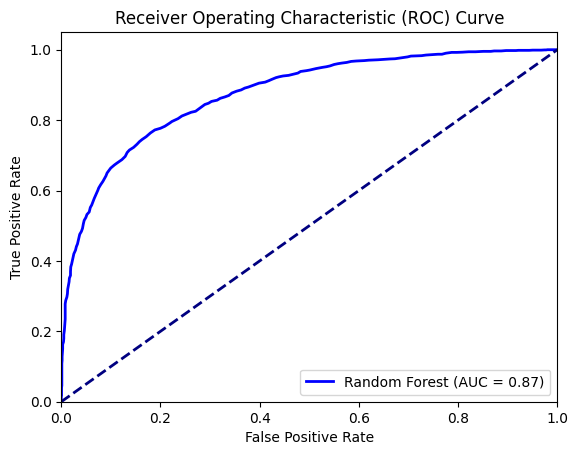

In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define a parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC: {roc_auc:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The Random Forest model has significantly improved performance compared to the logistic regression model. The AUC has increased to 0.87, indicating a much better ability to distinguish between the positive and negative classes. Additionally, the precision, recall, and F1-score metrics have improved for both classes.

**Summary of Metrics:**

1. Precision, Recall, and F1-Score:
- Class 0 (Negative):
   - Precision: 0.80
   - Recall: 0.76
   - F1-Score: 0.78
- Class 1 (Positive):
  - Precision: 0.77
  - Recall: 0.80
  - F1-Score: 0.79
2. Overall Accuracy:
- The overall accuracy is 0.78, which is a good improvement and indicates balanced performance across both classes.
3. ROC AUC:
- The ROC AUC of 0.87 suggests that the model has a high discriminative power and is effective at distinguishing between the two classes.

**Analysis and Interpretation:**
- Balanced Performance: The Random Forest model shows balanced performance across both classes, with similar precision, recall, and F1-scores for both the negative and positive classes. This indicates that the model is well-calibrated and performs well in identifying both CVD cases and non-cases.
- Improved Recall for Positive Class: The recall for the positive class (CVD cases) has significantly improved to 0.80, meaning the model is correctly identifying 80% of the actual CVD cases.

**Feature Important Analysis:**

Analyze the feature importance from the Random Forest model to understand which features contribute most to the prediction of CVD. This can provide insights into key factors influencing cardiovascular health.

    Feature  Importance
2     SYSBP    0.221428
1   TOTCHOL    0.207089
4       BMI    0.198940
3     DIABP    0.198297
0       AGE    0.154249
5  CURSMOKE    0.019997


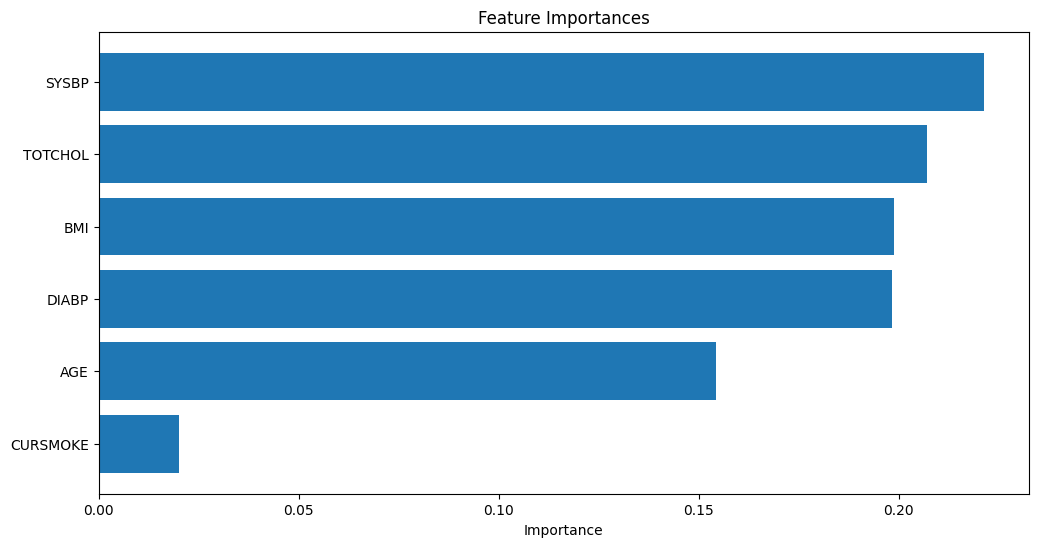

In [53]:
import pandas as pd

# Get feature importances from the Random Forest model
feature_importances = best_rf.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


# Implement Machine Learning, Deep Learning, and Advanced Combined models
1. Traditional ML Models:
 - Logistic Regression (LR)
 - Support Vector Machine (SVM)
2. Advanced Ensemble ML Models:
 - Random Forest (RF)
 - Gradient Boosting Machine (GBM)
3. Deep Learning Models:
 - Simple Neural Network (NN)
 - Convolutional Neural Network (CNN)
4. Advanced Combined Models:
 - Gated Recurrent Unit with Attention (GRU+Attention)
 - Convolutional Neural Network with GRU (CNN+GRU)

### Implementation Plan:
1. Prepare Data:
 - Load and preprocess the data.
 - Apply SMOTE to handle class imbalance.
2. Model Implementation and Evaluation:
 - Implement each model.
 - Tune hyperparameters using GridSearchCV or appropriate tuning techniques.
 - Evaluate model performance using metrics like accuracy, precision, recall, F1-score, and ROC AUC.
3. Comparison and Analysis:
 - Compare the performance of all models.
 - Identify the best-performing model.

## Traditional Machine Learning models

### Prepare the data

In [70]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
# data = pd.read_csv('/content/drive/MyDrive/data/frmgham2.csv')

# Define features and target
X = data[['AGE', 'TOTCHOL', 'SYSBP', 'DIABP', 'BMI', 'CURSMOKE','GLUCOSE', 'DIABETES', 'HEARTRTE']]
y = data['CVD']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f'ROC AUC: {roc_auc_lr:.2f}')

Logistic Regression
              precision    recall  f1-score   support

           0       0.65      0.66      0.65      1776
           1       0.64      0.63      0.63      1716

    accuracy                           0.64      3492
   macro avg       0.64      0.64      0.64      3492
weighted avg       0.64      0.64      0.64      3492

ROC AUC: 0.69


### Support Vector Machine (SVM)

In [72]:
from sklearn.svm import SVC

# Support Vector Machine
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)[:, 1]

# Evaluation
print("Support Vector Machine")
print(classification_report(y_test, y_pred_svm))
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
print(f'ROC AUC: {roc_auc_svm:.2f}')

Support Vector Machine
              precision    recall  f1-score   support

           0       0.68      0.65      0.66      1776
           1       0.65      0.69      0.67      1716

    accuracy                           0.67      3492
   macro avg       0.67      0.67      0.67      3492
weighted avg       0.67      0.67      0.67      3492

ROC AUC: 0.72


## Advanced Ensemble ML Models

### Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f'ROC AUC: {roc_auc_rf:.2f}')

Random Forest
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1776
           1       0.81      0.82      0.81      1716

    accuracy                           0.82      3492
   macro avg       0.81      0.82      0.81      3492
weighted avg       0.82      0.82      0.82      3492

ROC AUC: 0.90


### Gradient Boosting Machine

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Machine
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)

# Predictions
y_pred_gbm = gbm.predict(X_test)
y_proba_gbm = gbm.predict_proba(X_test)[:, 1]

# Evaluation
print("Gradient Boosting Machine")
print(classification_report(y_test, y_pred_gbm))
roc_auc_gbm = roc_auc_score(y_test, y_proba_gbm)
print(f'ROC AUC: {roc_auc_gbm:.2f}')

Gradient Boosting Machine
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1776
           1       0.73      0.74      0.74      1716

    accuracy                           0.74      3492
   macro avg       0.74      0.74      0.74      3492
weighted avg       0.74      0.74      0.74      3492

ROC AUC: 0.82


## Deep Learning models

### Simple Neural Network

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Simple Neural Network
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_proba_nn = model_nn.predict(X_test).ravel()
y_pred_nn = (y_proba_nn > 0.5).astype(int)

# Evaluation
print("Simple Neural Network")
print(classification_report(y_test, y_pred_nn))
roc_auc_nn = roc_auc_score(y_test, y_proba_nn)
print(f'ROC AUC: {roc_auc_nn:.2f}')

Epoch 1/50
350/350 [==============================] - 2s 3ms/step - loss: 0.6422 - accuracy: 0.6306 - val_loss: 0.6378 - val_accuracy: 0.6402
Epoch 2/50
350/350 [==============================] - 1s 3ms/step - loss: 0.6304 - accuracy: 0.6394 - val_loss: 0.6379 - val_accuracy: 0.6434
Epoch 3/50
350/350 [==============================] - 1s 3ms/step - loss: 0.6264 - accuracy: 0.6439 - val_loss: 0.6405 - val_accuracy: 0.6341
Epoch 4/50
350/350 [==============================] - 1s 3ms/step - loss: 0.6238 - accuracy: 0.6458 - val_loss: 0.6375 - val_accuracy: 0.6373
Epoch 5/50
350/350 [==============================] - 1s 3ms/step - loss: 0.6206 - accuracy: 0.6486 - val_loss: 0.6359 - val_accuracy: 0.6445
Epoch 6/50
350/350 [==============================] - 1s 3ms/step - loss: 0.6184 - accuracy: 0.6504 - val_loss: 0.6344 - val_accuracy: 0.6430
Epoch 7/50
350/350 [==============================] - 1s 3ms/step - loss: 0.6171 - accuracy: 0.6547 - val_loss: 0.6340 - val_accuracy: 0.6441
Epoch 

### Convolutional Neural Network (CNN)

In [76]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Reshape data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Convolutional Neural Network
model_cnn = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_proba_cnn = model_cnn.predict(X_test_cnn).ravel()
y_pred_cnn = (y_proba_cnn > 0.5).astype(int)

# Evaluation
print("Convolutional Neural Network")
print(classification_report(y_test, y_pred_cnn))
roc_auc_cnn = roc_auc_score(y_test, y_proba_cnn)
print(f'ROC AUC: {roc_auc_cnn:.2f}')

Epoch 1/50
350/350 [==============================] - 2s 3ms/step - loss: 0.6488 - accuracy: 0.6239 - val_loss: 0.6455 - val_accuracy: 0.6284
Epoch 2/50
350/350 [==============================] - 1s 3ms/step - loss: 0.6392 - accuracy: 0.6300 - val_loss: 0.6422 - val_accuracy: 0.6362
Epoch 3/50
350/350 [==============================] - 1s 3ms/step - loss: 0.6351 - accuracy: 0.6381 - val_loss: 0.6424 - val_accuracy: 0.6341
Epoch 4/50
350/350 [==============================] - 1s 3ms/step - loss: 0.6321 - accuracy: 0.6392 - val_loss: 0.6415 - val_accuracy: 0.6412
Epoch 5/50
350/350 [==============================] - 1s 3ms/step - loss: 0.6300 - accuracy: 0.6371 - val_loss: 0.6381 - val_accuracy: 0.6337
Epoch 6/50
350/350 [==============================] - 1s 3ms/step - loss: 0.6279 - accuracy: 0.6426 - val_loss: 0.6388 - val_accuracy: 0.6387
Epoch 7/50
350/350 [==============================] - 1s 3ms/step - loss: 0.6254 - accuracy: 0.6445 - val_loss: 0.6511 - val_accuracy: 0.6266
Epoch 

## Advanced Comined Models

### GRU with Attention

In [79]:
from tensorflow.keras.layers import GRU, Attention

# GRU with Attention
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1], 1))
gru_layer = GRU(64, return_sequences=True)(input_layer)
attention_layer = Attention()([gru_layer, gru_layer])
flatten_layer = Flatten()(attention_layer)
output_layer = Dense(1, activation='sigmoid')(flatten_layer)

model_gru_attention = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model_gru_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_gru_attention.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_proba_gru_attention = model_gru_attention.predict(X_test_cnn).ravel()
y_pred_gru_attention = (y_proba_gru_attention > 0.5).astype(int)

# Evaluation
print("GRU with Attention")
print(classification_report(y_test, y_pred_gru_attention))
roc_auc_gru_attention = roc_auc_score(y_test, y_proba_gru_attention)
print(f'ROC AUC: {roc_auc_gru_attention:.2f}')

Epoch 1/50
350/350 [==============================] - 5s 10ms/step - loss: 0.6554 - accuracy: 0.6173 - val_loss: 0.6580 - val_accuracy: 0.6151
Epoch 2/50
350/350 [==============================] - 3s 8ms/step - loss: 0.6492 - accuracy: 0.6242 - val_loss: 0.6568 - val_accuracy: 0.6144
Epoch 3/50
350/350 [==============================] - 3s 8ms/step - loss: 0.6459 - accuracy: 0.6258 - val_loss: 0.6483 - val_accuracy: 0.6183
Epoch 4/50
350/350 [==============================] - 3s 8ms/step - loss: 0.6416 - accuracy: 0.6295 - val_loss: 0.6474 - val_accuracy: 0.6223
Epoch 5/50
350/350 [==============================] - 3s 8ms/step - loss: 0.6395 - accuracy: 0.6298 - val_loss: 0.6450 - val_accuracy: 0.6226
Epoch 6/50
350/350 [==============================] - 3s 8ms/step - loss: 0.6380 - accuracy: 0.6338 - val_loss: 0.6492 - val_accuracy: 0.6255
Epoch 7/50
350/350 [==============================] - 3s 7ms/step - loss: 0.6354 - accuracy: 0.6347 - val_loss: 0.6418 - val_accuracy: 0.6312
Epoch

### CNN with GRU

In [80]:
# CNN with GRU
cnn_layer = Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1))(input_layer)
pooling_layer = MaxPooling1D(pool_size=2)(cnn_layer)
gru_layer = GRU(64)(pooling_layer)
output_layer = Dense(1, activation='sigmoid')(gru_layer)

model_cnn_gru = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model_cnn_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn_gru.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_proba_cnn_gru = model_cnn_gru.predict(X_test_cnn).ravel()
y_pred_cnn_gru = (y_proba_cnn_gru > 0.5).astype(int)

# Evaluation
print("CNN with GRU")
print(classification_report(y_test, y_pred_cnn_gru))
roc_auc_cnn_gru = roc_auc_score(y_test, y_proba_cnn_gru)
print(f'ROC AUC: {roc_auc_cnn_gru:.2f}')

Epoch 1/50
350/350 [==============================] - 4s 8ms/step - loss: 0.6542 - accuracy: 0.6130 - val_loss: 0.6561 - val_accuracy: 0.6094
Epoch 2/50
350/350 [==============================] - 2s 7ms/step - loss: 0.6441 - accuracy: 0.6247 - val_loss: 0.6527 - val_accuracy: 0.6162
Epoch 3/50
350/350 [==============================] - 2s 7ms/step - loss: 0.6394 - accuracy: 0.6305 - val_loss: 0.6515 - val_accuracy: 0.6137
Epoch 4/50
350/350 [==============================] - 2s 7ms/step - loss: 0.6371 - accuracy: 0.6341 - val_loss: 0.6441 - val_accuracy: 0.6269
Epoch 5/50
350/350 [==============================] - 2s 6ms/step - loss: 0.6345 - accuracy: 0.6343 - val_loss: 0.6445 - val_accuracy: 0.6284
Epoch 6/50
350/350 [==============================] - 2s 6ms/step - loss: 0.6334 - accuracy: 0.6360 - val_loss: 0.6442 - val_accuracy: 0.6355
Epoch 7/50
350/350 [==============================] - 2s 7ms/step - loss: 0.6310 - accuracy: 0.6383 - val_loss: 0.6446 - val_accuracy: 0.6341
Epoch 

## Comparison and Analysis

In [81]:
# Summarize all ROC AUC scores
roc_auc_scores = {
    'Logistic Regression': roc_auc_lr,
    'Support Vector Machine': roc_auc_svm,
    'Random Forest': roc_auc_rf,
    'Gradient Boosting Machine': roc_auc_gbm,
    'Simple Neural Network': roc_auc_nn,
    'Convolutional Neural Network': roc_auc_cnn,
    'GRU with Attention': roc_auc_gru_attention,
    'CNN with GRU': roc_auc_cnn_gru
}

# Print all ROC AUC scores
for model, score in roc_auc_scores.items():
    print(f'{model}: ROC AUC = {score:.2f}')

Logistic Regression: ROC AUC = 0.69
Support Vector Machine: ROC AUC = 0.72
Random Forest: ROC AUC = 0.90
Gradient Boosting Machine: ROC AUC = 0.82
Simple Neural Network: ROC AUC = 0.72
Convolutional Neural Network: ROC AUC = 0.72
GRU with Attention: ROC AUC = 0.72
CNN with GRU: ROC AUC = 0.74


### Key Observations:
- The Random Forest model significantly outperforms the other models with a ROC AUC of 0.90.
- Ensemble methods like Random Forest and Gradient Boosting Machine generally perform well, but Random Forest has a clear edge in this case.
- Deep learning models (Simple Neural Network, CNN, GRU with Attention, CNN with GRU) show reasonable performance but do not surpass the Random Forest model.
- Traditional ML models (Logistic Regression, SVM) have lower ROC AUC scores compared to ensemble methods and deep learning models.

Random Forest Feature Importances
    Feature  Importance
2     SYSBP    0.165215
1   TOTCHOL    0.144676
4       BMI    0.141936
3     DIABP    0.139735
6   GLUCOSE    0.137454
8  HEARTRTE    0.125564
0       AGE    0.122372
5  CURSMOKE    0.017288
7  DIABETES    0.005760


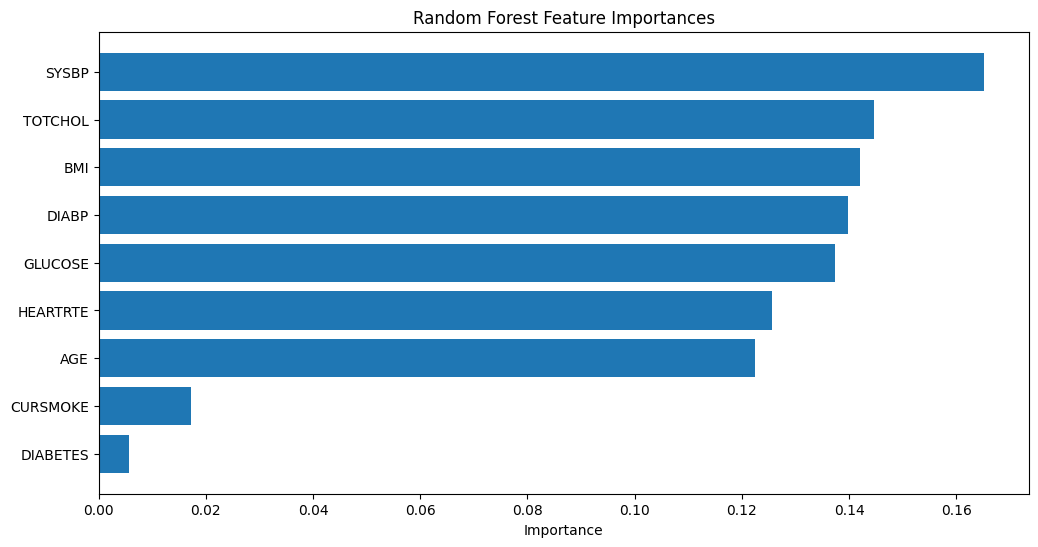

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the improved Random Forest model
feature_importances_rf = rf.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
importance_df_rf = pd.DataFrame({'Feature': features, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Random Forest Feature Importances")
print(importance_df_rf)

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

    Feature  Importance
2     SYSBP    0.220885
1   TOTCHOL    0.205839
4       BMI    0.199627
3     DIABP    0.199518
0       AGE    0.154453
5  CURSMOKE    0.019677


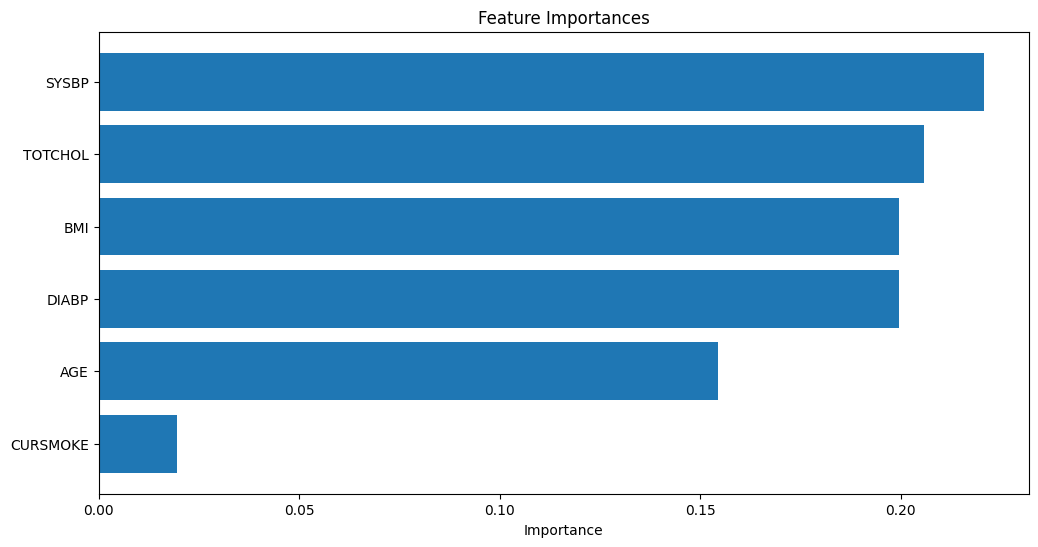

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the Random Forest model
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

Stacking Ensemble
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1776
           1       0.83      0.81      0.82      1716

    accuracy                           0.82      3492
   macro avg       0.82      0.82      0.82      3492
weighted avg       0.82      0.82      0.82      3492

ROC AUC: 0.91


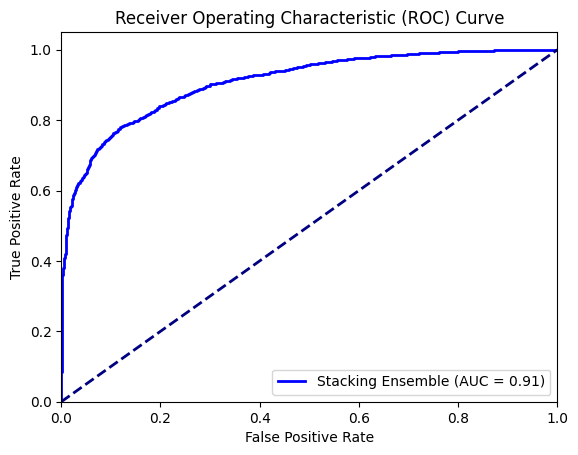

In [83]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gbm', GradientBoostingClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# Define the meta-learner model
meta_model = LogisticRegression()

# Create the stacking ensemble
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking ensemble
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking ensemble
y_pred_stack = stacking_clf.predict(X_test)
y_proba_stack = stacking_clf.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("Stacking Ensemble")
print(classification_report(y_test, y_pred_stack))
roc_auc_stack = roc_auc_score(y_test, y_proba_stack)
print(f'ROC AUC: {roc_auc_stack:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_stack)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Stacking Ensemble (AUC = {roc_auc_stack:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [84]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_stack)

# Print confusion matrix
print("Confusion Matrix")
print(cm)


Confusion Matrix
[[1486  290]
 [ 333 1383]]


### Feature importances from the Random Forest model

Random Forest Feature Importances
    Feature  Importance
2     SYSBP    0.220885
1   TOTCHOL    0.205839
4       BMI    0.199627
3     DIABP    0.199518
0       AGE    0.154453
5  CURSMOKE    0.019677


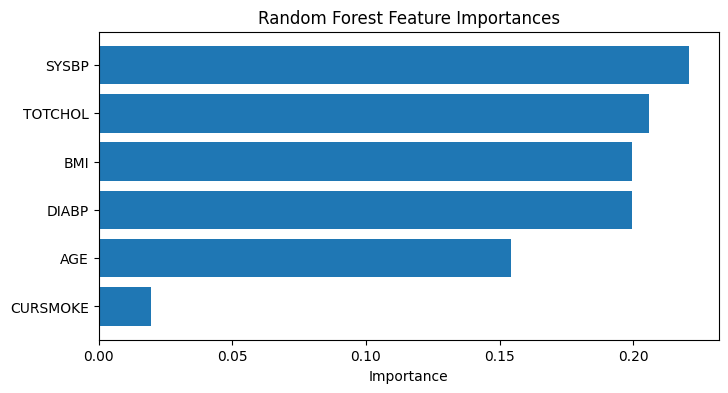

Gradient Boosting Machine Feature Importances
    Feature  Importance
3     DIABP    0.399615
2     SYSBP    0.284942
0       AGE    0.141335
4       BMI    0.095595
1   TOTCHOL    0.069360
5  CURSMOKE    0.009153


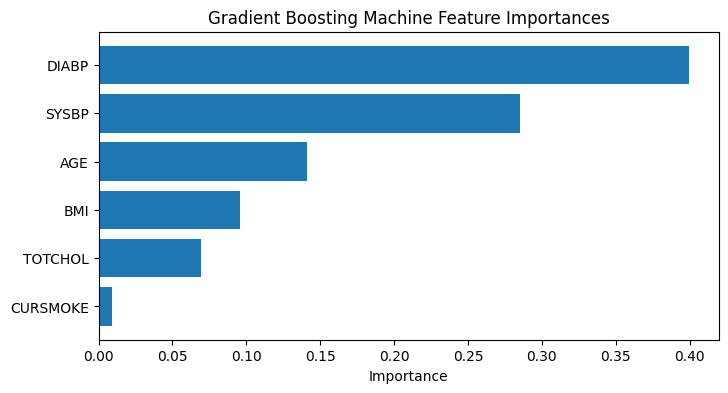

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the Random Forest model
feature_importances_rf = rf.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
importance_df_rf = pd.DataFrame({'Feature': features, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Random Forest Feature Importances")
print(importance_df_rf)

# Plot the feature importances
plt.figure(figsize=(8, 4))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

# Similarly, get feature importances from the Gradient Boosting model
feature_importances_gbm = gbm.feature_importances_
importance_df_gbm = pd.DataFrame({'Feature': features, 'Importance': feature_importances_gbm})
importance_df_gbm = importance_df_gbm.sort_values(by='Importance', ascending=False)

print("Gradient Boosting Machine Feature Importances")
print(importance_df_gbm)

plt.figure(figsize=(8, 4))
plt.barh(importance_df_gbm['Feature'], importance_df_gbm['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Gradient Boosting Machine Feature Importances')
plt.show()


# Other Important Works

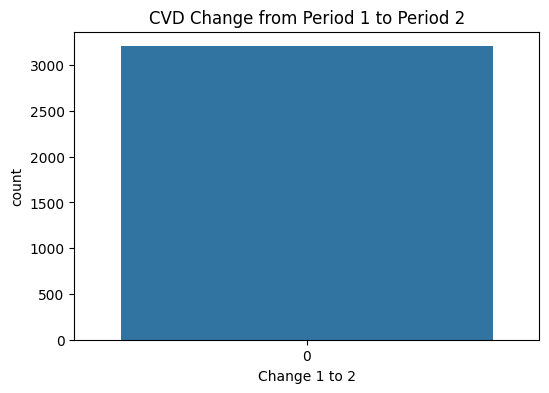

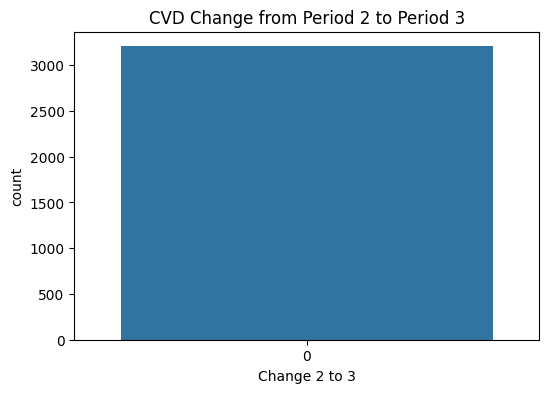

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary_stats = cvd_changes_df.describe()

# Visualize the changes
plt.figure(figsize=(6, 4))
sns.countplot(x='Change 1 to 2', data=cvd_changes_df)
plt.title('CVD Change from Period 1 to Period 2')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Change 2 to 3', data=cvd_changes_df)
plt.title('CVD Change from Period 2 to Period 3')
plt.show()

In [93]:
# Check if CVD status is consistent for each individual across periods
cvd_status_consistency = []

# Iterate through each group to check CVD status
for name, group in grouped:
    group = group.sort_values(by='PERIOD')  # Ensure the records are sorted by PERIOD
    periods = group['PERIOD'].values
    cvd_status = group['CVD'].values

    if len(periods) == 3:  # Ensure there are 3 periods for the individual
        consistency = all(cvd_status == cvd_status[0])  # Check if all elements are the same
        cvd_status_consistency.append({
            'RANDID': name,
            'CVD Consistent': consistency,
            'CVD Period 1': cvd_status[0],
            'CVD Period 2': cvd_status[1],
            'CVD Period 3': cvd_status[2]
        })

# Convert the results into a DataFrame
cvd_consistency_df = pd.DataFrame(cvd_status_consistency)

# Display the consistency results
cvd_consistency_df.head()

# Summary of consistency
consistency_summary = cvd_consistency_df['CVD Consistent'].value_counts()
print(consistency_summary)


CVD Consistent
True    3206
Name: count, dtype: int64


             RANDID  TOTCHOL Period 1  TOTCHOL Period 2  TOTCHOL Period 3  \
count  3.206000e+03       3206.000000       3206.000000       3206.000000   
mean   5.022454e+06        235.457953        249.647806        236.877139   
std    2.903083e+06         43.806844         44.201795         42.938028   
min    6.238000e+03        113.000000        115.000000        112.000000   
25%    2.503999e+06        205.000000        220.250000        208.000000   
50%    5.039256e+06        233.000000        244.500000        238.000000   
75%    7.487529e+06        261.000000        274.000000        261.000000   
max    9.999312e+06        696.000000        638.000000        625.000000   

       Change 1 to 2  Change 2 to 3  
count    3206.000000    3206.000000  
mean       14.189853     -12.770667  
std        32.666277      35.944672  
min      -159.000000    -368.000000  
25%        -4.750000     -34.000000  
50%        14.000000     -13.000000  
75%        33.000000       9.000000  
ma

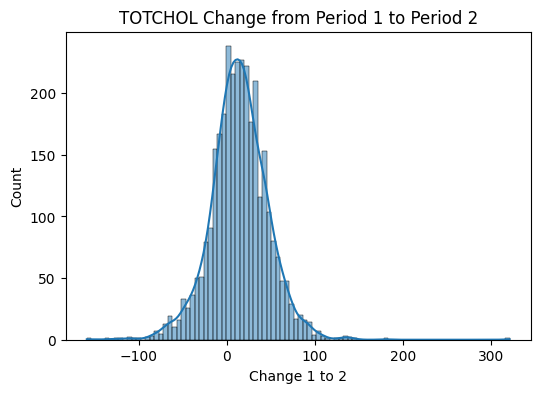

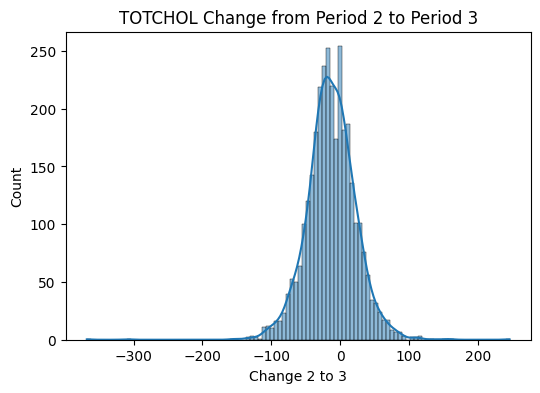

             RANDID  AGE Period 1  AGE Period 2  AGE Period 3  Change 1 to 2  \
count  3.206000e+03    3206.00000   3206.000000   3206.000000    3206.000000   
mean   5.022454e+06      48.71335     54.670306     60.636619       5.956956   
std    2.903083e+06       8.31617      8.297294      8.296639       0.360300   
min    6.238000e+03      32.00000     39.000000     44.000000       5.000000   
25%    2.503999e+06      42.00000     48.000000     54.000000       6.000000   
50%    5.039256e+06      48.00000     54.000000     60.000000       6.000000   
75%    7.487529e+06      55.00000     61.000000     67.000000       6.000000   
max    9.999312e+06      70.00000     75.000000     81.000000       7.000000   

       Change 2 to 3  
count    3206.000000  
mean        5.966313  
std         0.391151  
min         4.000000  
25%         6.000000  
50%         6.000000  
75%         6.000000  
max         8.000000  


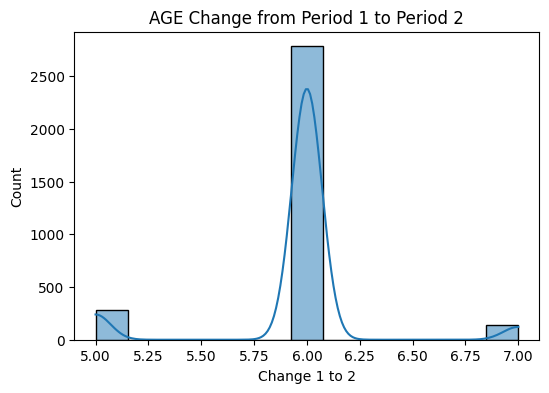

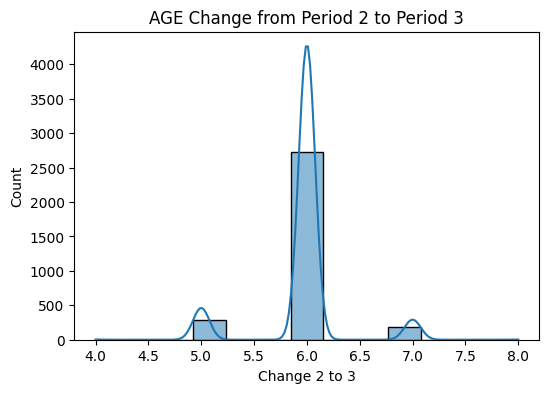

             RANDID  SYSBP Period 1  SYSBP Period 2  SYSBP Period 3  \
count  3.206000e+03     3206.000000     3206.000000     3206.000000   
mean   5.022454e+06      130.128977      135.674984      140.184654   
std    2.903083e+06       20.067215       21.591397       22.920555   
min    6.238000e+03       83.500000       88.000000       86.000000   
25%    2.503999e+06      116.000000      120.000000      123.000000   
50%    5.039256e+06      127.000000      132.000000      137.000000   
75%    7.487529e+06      140.000000      148.000000      154.000000   
max    9.999312e+06      243.000000      243.000000      267.000000   

       Change 1 to 2  Change 2 to 3  
count    3206.000000    3206.000000  
mean        5.546007       4.509669  
std        15.710857      17.913658  
min       -79.000000     -80.000000  
25%        -4.500000      -6.000000  
50%         5.000000       4.000000  
75%        15.000000      15.000000  
max       106.000000     119.000000  


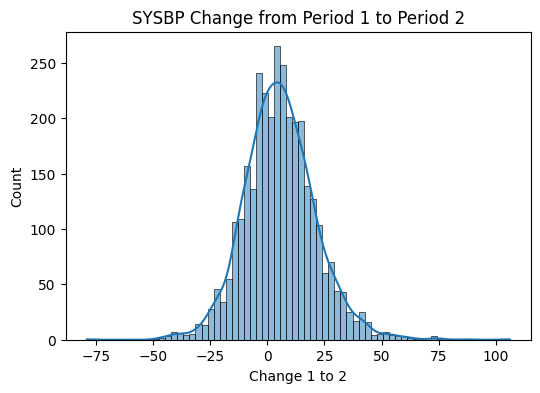

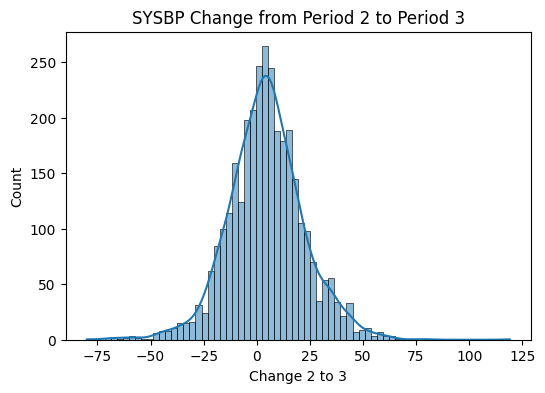

             RANDID  DIABP Period 1  DIABP Period 2  DIABP Period 3  \
count  3.206000e+03     3206.000000     3206.000000     3206.000000   
mean   5.022454e+06       82.176856       83.847318       81.785246   
std    2.903083e+06       11.289071       11.072305       11.251658   
min    6.238000e+03       50.000000       50.000000       30.000000   
25%    2.503999e+06       74.000000       77.000000       74.000000   
50%    5.039256e+06       81.000000       83.000000       80.000000   
75%    7.487529e+06       88.000000       90.000000       89.000000   
max    9.999312e+06      142.500000      134.000000      130.000000   

       Change 1 to 2  Change 2 to 3  
count    3206.000000    3206.000000  
mean        1.670462      -2.062071  
std         9.680377      10.378983  
min       -43.500000     -53.000000  
25%        -4.500000      -8.875000  
50%         2.000000      -2.000000  
75%         8.000000       5.000000  
max        51.500000      51.000000  


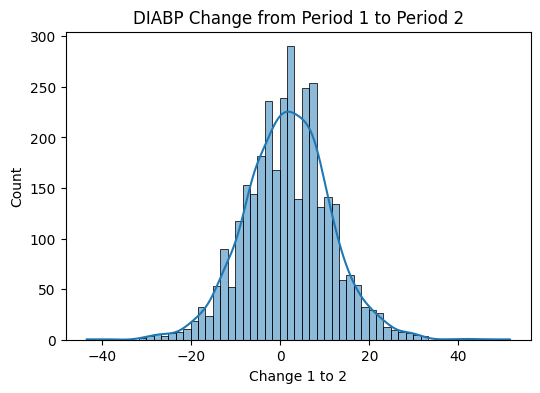

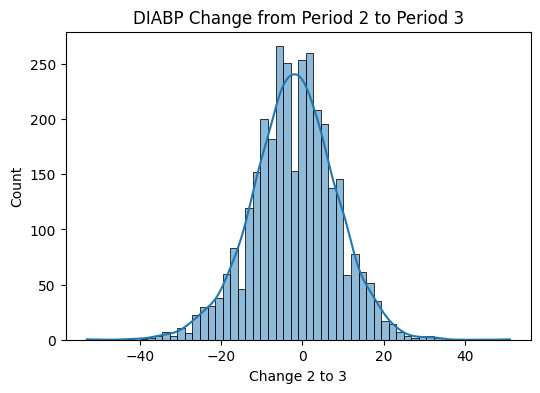

             RANDID  BMI Period 1  BMI Period 2  BMI Period 3  Change 1 to 2  \
count  3.206000e+03   3206.000000   3206.000000   3206.000000    3206.000000   
mean   5.022454e+06     25.736398     25.863318     25.901953       0.126920   
std    2.903083e+06      3.972913      4.043676      4.072200       1.745030   
min    6.238000e+03     15.540000     15.330000     14.430000     -12.662651   
25%    2.503999e+06     23.070000     23.100000     23.222500      -0.800000   
50%    5.039256e+06     25.340000     25.510000     25.495000       0.170000   
75%    7.487529e+06     27.930000     27.940000     28.055000       1.100000   
max    9.999312e+06     56.800000     56.800000     56.800000      10.430000   

       Change 2 to 3  
count    3206.000000  
mean        0.038636  
std         1.943007  
min       -12.140000  
25%        -0.930000  
50%         0.140000  
75%         1.050000  
max        19.212651  


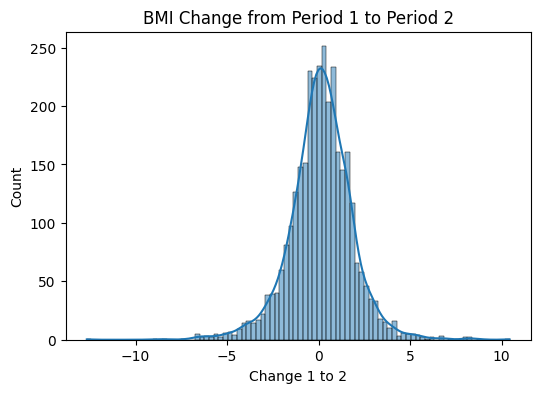

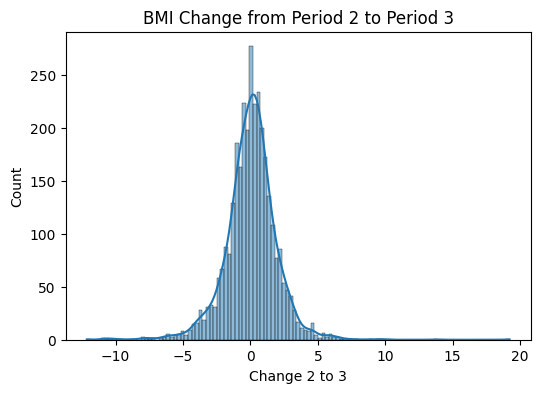

             RANDID  DIABETES Period 1  DIABETES Period 2  DIABETES Period 3  \
count  3.206000e+03        3206.000000        3206.000000        3206.000000   
mean   5.022454e+06           0.018091           0.032751           0.078291   
std    2.903083e+06           0.133302           0.178012           0.268670   
min    6.238000e+03           0.000000           0.000000           0.000000   
25%    2.503999e+06           0.000000           0.000000           0.000000   
50%    5.039256e+06           0.000000           0.000000           0.000000   
75%    7.487529e+06           0.000000           0.000000           0.000000   
max    9.999312e+06           1.000000           1.000000           1.000000   

       Change 1 to 2  Change 2 to 3  
count    3206.000000    3206.000000  
mean        0.014660       0.045540  
std         0.120207       0.208517  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0

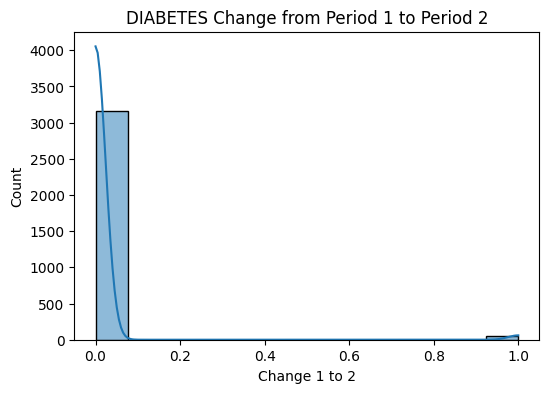

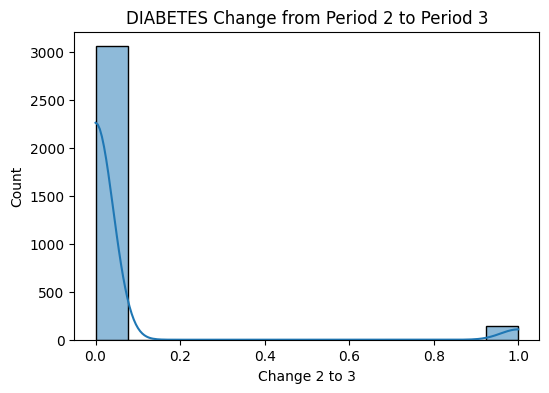

             RANDID  GLUCOSE Period 1  GLUCOSE Period 2  GLUCOSE Period 3  \
count  3.206000e+03       3206.000000       3206.000000       3206.000000   
mean   5.022454e+06         81.243710         81.636876         88.873144   
std    2.903083e+06         18.979571         20.140819         25.849197   
min    6.238000e+03         40.000000         40.000000         46.000000   
25%    2.503999e+06         72.000000         72.000000         78.000000   
50%    5.039256e+06         79.000000         79.000000         84.124865   
75%    7.487529e+06         85.000000         85.000000         93.000000   
max    9.999312e+06        386.000000        420.000000        478.000000   

       Change 1 to 2  Change 2 to 3  
count    3206.000000    3206.000000  
mean        0.393166       7.236268  
std        22.189996      26.525460  
min      -263.875135    -277.875135  
25%       -10.000000      -3.875135  
50%         0.000000       5.937567  
75%        10.000000      17.000000  
ma

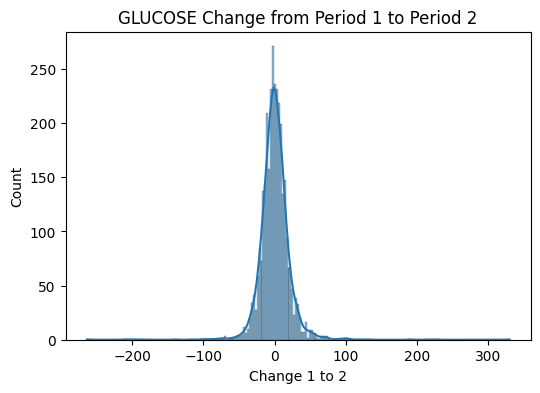

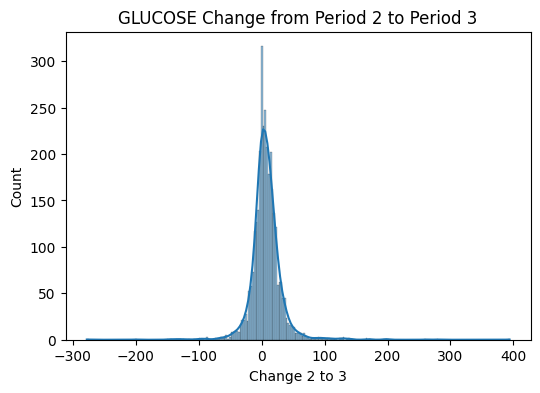

             RANDID  LDLC Period 1  LDLC Period 2  LDLC Period 3  \
count  3.206000e+03    3206.000000    3206.000000    3206.000000   
mean   5.022454e+06     176.466953     176.466953     176.186005   
std    2.903083e+06       0.000000       0.000000      45.121281   
min    6.238000e+03     176.466953     176.466953      20.000000   
25%    2.503999e+06     176.466953     176.466953     147.000000   
50%    5.039256e+06     176.466953     176.466953     176.466953   
75%    7.487529e+06     176.466953     176.466953     201.000000   
max    9.999312e+06     176.466953     176.466953     565.000000   

       Change 1 to 2  Change 2 to 3  
count         3206.0    3206.000000  
mean             0.0      -0.280948  
std              0.0      45.121281  
min              0.0    -156.466953  
25%              0.0     -29.466953  
50%              0.0       0.000000  
75%              0.0      24.533047  
max              0.0     388.533047  


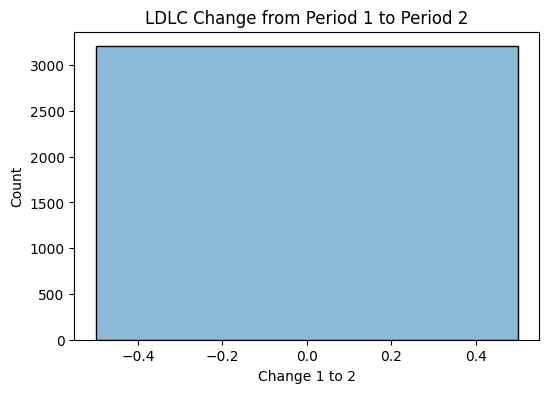

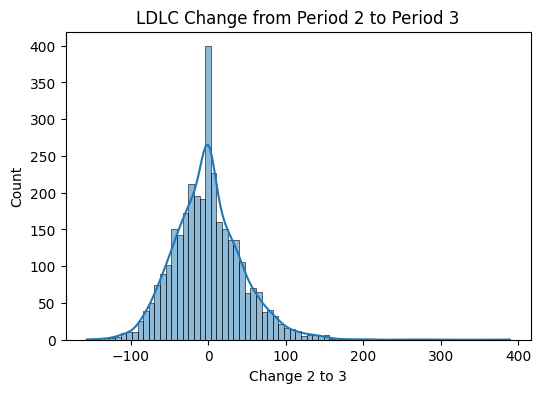

             RANDID  HEARTRTE Period 1  HEARTRTE Period 2  HEARTRTE Period 3  \
count  3.206000e+03        3206.000000        3206.000000        3206.000000   
mean   5.022454e+06          75.234560          76.833437          77.347025   
std    2.903083e+06          11.804143          12.622011          12.432244   
min    6.238000e+03          44.000000          42.000000          37.000000   
25%    2.503999e+06          67.000000          70.000000          70.000000   
50%    5.039256e+06          75.000000          75.000000          76.000000   
75%    7.487529e+06          82.000000          85.000000          85.000000   
max    9.999312e+06         125.000000         220.000000         150.000000   

       Change 1 to 2  Change 2 to 3  
count    3206.000000    3206.000000  
mean        1.598877       0.513588  
std        12.215565      12.200198  
min       -50.000000    -142.000000  
25%        -5.000000      -6.000000  
50%         1.000000       0.000000  
75%        10

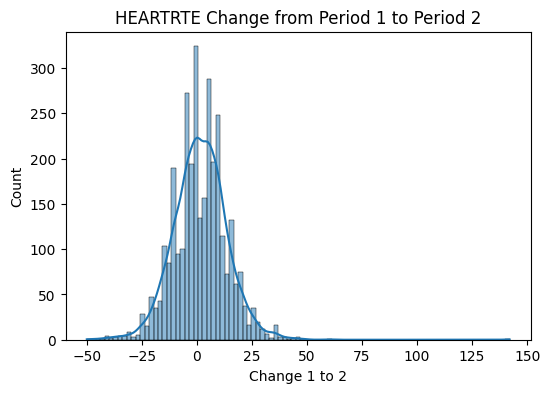

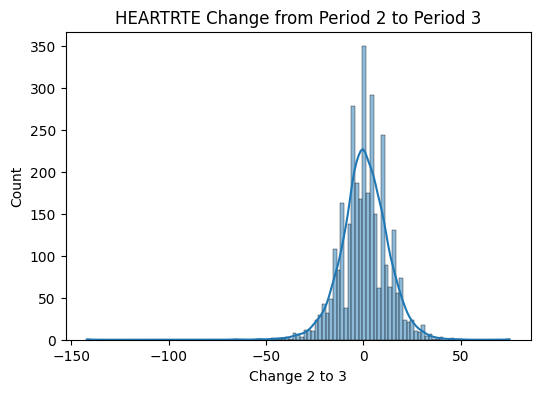

             RANDID  DEATH Period 1  DEATH Period 2  DEATH Period 3  \
count  3.206000e+03     3206.000000     3206.000000     3206.000000   
mean   5.022454e+06        0.236432        0.236432        0.236432   
std    2.903083e+06        0.424957        0.424957        0.424957   
min    6.238000e+03        0.000000        0.000000        0.000000   
25%    2.503999e+06        0.000000        0.000000        0.000000   
50%    5.039256e+06        0.000000        0.000000        0.000000   
75%    7.487529e+06        0.000000        0.000000        0.000000   
max    9.999312e+06        1.000000        1.000000        1.000000   

       Change 1 to 2  Change 2 to 3  
count         3206.0         3206.0  
mean             0.0            0.0  
std              0.0            0.0  
min              0.0            0.0  
25%              0.0            0.0  
50%              0.0            0.0  
75%              0.0            0.0  
max              0.0            0.0  


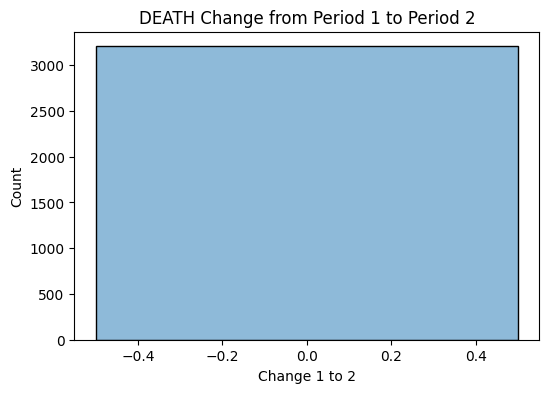

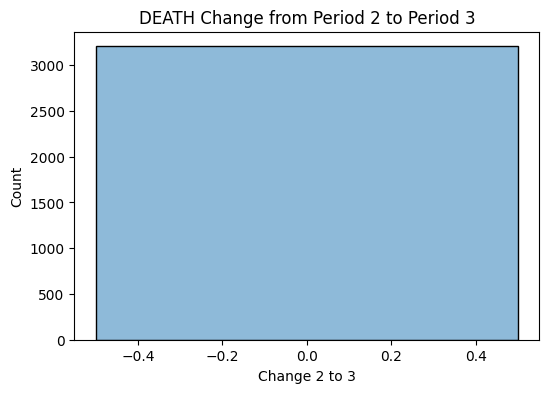

In [98]:
# Function to analyze changes in other health-related variables
def analyze_variable_changes(variable):
    changes = []

    for name, group in grouped:
        group = group.sort_values(by='PERIOD')  # Ensure the records are sorted by PERIOD
        periods = group['PERIOD'].values
        values = group[variable].values

        if len(periods) == 3:  # Ensure there are 3 periods for the individual
            change_1_to_2 = values[1] - values[0]
            change_2_to_3 = values[2] - values[1]
            changes.append({
                'RANDID': name,
                f'{variable} Period 1': values[0],
                f'{variable} Period 2': values[1],
                f'{variable} Period 3': values[2],
                f'Change 1 to 2': change_1_to_2,
                f'Change 2 to 3': change_2_to_3
            })

    # Convert the results into a DataFrame
    changes_df = pd.DataFrame(changes)

    # Summary statistics
    summary_stats = changes_df.describe()

    # Display the changes for verification
    print(summary_stats)
    changes_df.head()

    # Visualize the changes
    plt.figure(figsize=(6, 4))
    sns.histplot(changes_df[f'Change 1 to 2'], kde=True)
    plt.title(f'{variable} Change from Period 1 to Period 2')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(changes_df[f'Change 2 to 3'], kde=True)
    plt.title(f'{variable} Change from Period 2 to Period 3')
    plt.show()

# Analyze changes for specific variables
analyze_variable_changes('TOTCHOL')
analyze_variable_changes('AGE')
analyze_variable_changes('SYSBP')
analyze_variable_changes('DIABP')
analyze_variable_changes('BMI')
analyze_variable_changes('DIABETES')
analyze_variable_changes('GLUCOSE')
analyze_variable_changes('LDLC')
analyze_variable_changes('HEARTRTE')
analyze_variable_changes('DEATH')

             RANDID  BMI Period 1  BMI Period 2  BMI Period 3  Change 1 to 2  \
count  3.206000e+03   3206.000000   3206.000000   3206.000000    3206.000000   
mean   5.022454e+06     25.736398     25.863318     25.901953       0.126920   
std    2.903083e+06      3.972913      4.043676      4.072200       1.745030   
min    6.238000e+03     15.540000     15.330000     14.430000     -12.662651   
25%    2.503999e+06     23.070000     23.100000     23.222500      -0.800000   
50%    5.039256e+06     25.340000     25.510000     25.495000       0.170000   
75%    7.487529e+06     27.930000     27.940000     28.055000       1.100000   
max    9.999312e+06     56.800000     56.800000     56.800000      10.430000   

       Change 2 to 3  
count    3206.000000  
mean        0.038636  
std         1.943007  
min       -12.140000  
25%        -0.930000  
50%         0.140000  
75%         1.050000  
max        19.212651  


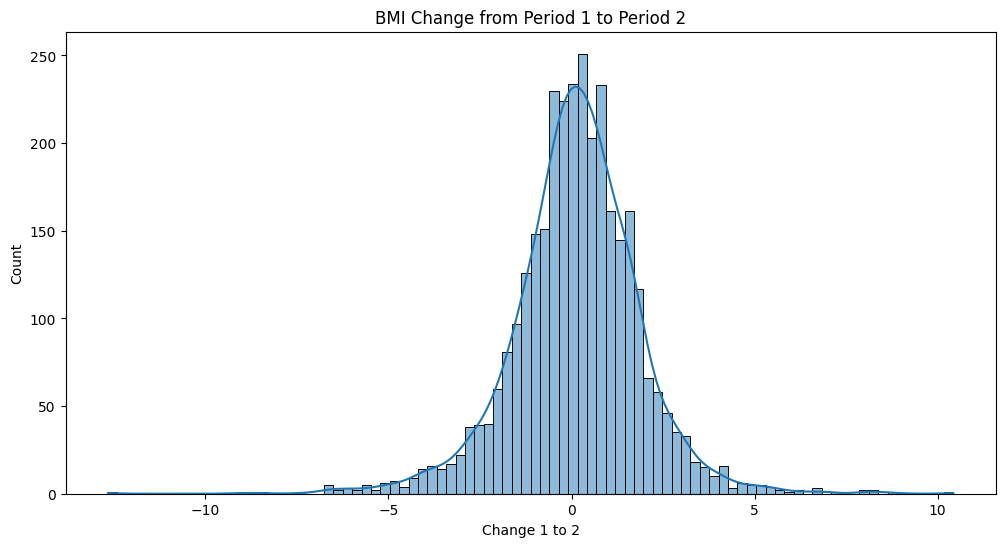

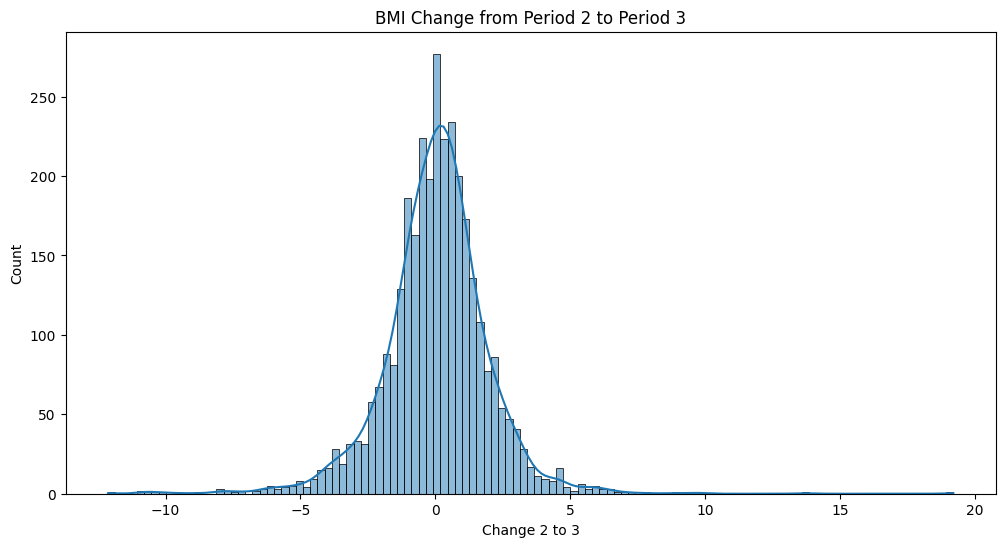

             RANDID  DIABP Period 1  DIABP Period 2  DIABP Period 3  \
count  3.206000e+03     3206.000000     3206.000000     3206.000000   
mean   5.022454e+06       82.176856       83.847318       81.785246   
std    2.903083e+06       11.289071       11.072305       11.251658   
min    6.238000e+03       50.000000       50.000000       30.000000   
25%    2.503999e+06       74.000000       77.000000       74.000000   
50%    5.039256e+06       81.000000       83.000000       80.000000   
75%    7.487529e+06       88.000000       90.000000       89.000000   
max    9.999312e+06      142.500000      134.000000      130.000000   

       Change 1 to 2  Change 2 to 3  
count    3206.000000    3206.000000  
mean        1.670462      -2.062071  
std         9.680377      10.378983  
min       -43.500000     -53.000000  
25%        -4.500000      -8.875000  
50%         2.000000      -2.000000  
75%         8.000000       5.000000  
max        51.500000      51.000000  


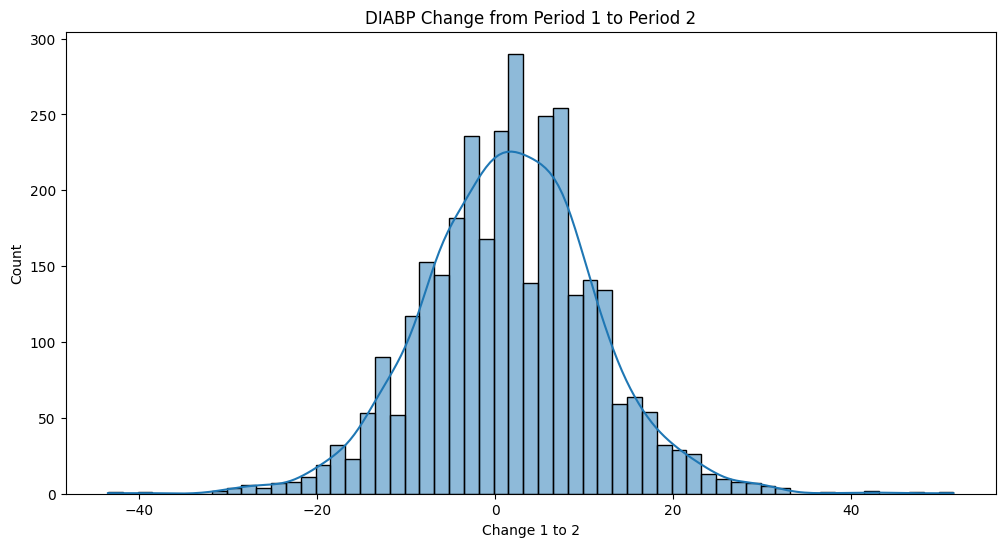

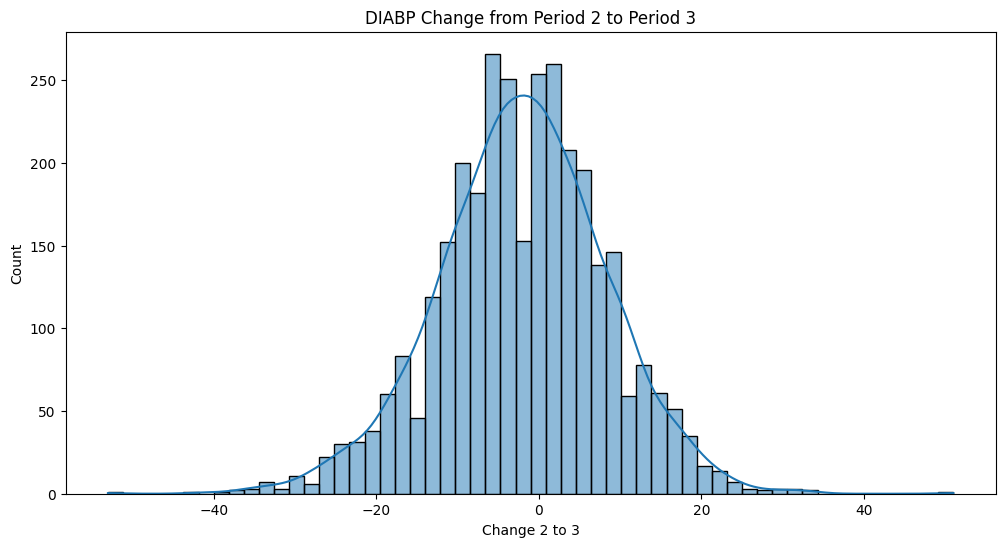

             RANDID  SYSBP Period 1  SYSBP Period 2  SYSBP Period 3  \
count  3.206000e+03     3206.000000     3206.000000     3206.000000   
mean   5.022454e+06      130.128977      135.674984      140.184654   
std    2.903083e+06       20.067215       21.591397       22.920555   
min    6.238000e+03       83.500000       88.000000       86.000000   
25%    2.503999e+06      116.000000      120.000000      123.000000   
50%    5.039256e+06      127.000000      132.000000      137.000000   
75%    7.487529e+06      140.000000      148.000000      154.000000   
max    9.999312e+06      243.000000      243.000000      267.000000   

       Change 1 to 2  Change 2 to 3  
count    3206.000000    3206.000000  
mean        5.546007       4.509669  
std        15.710857      17.913658  
min       -79.000000     -80.000000  
25%        -4.500000      -6.000000  
50%         5.000000       4.000000  
75%        15.000000      15.000000  
max       106.000000     119.000000  


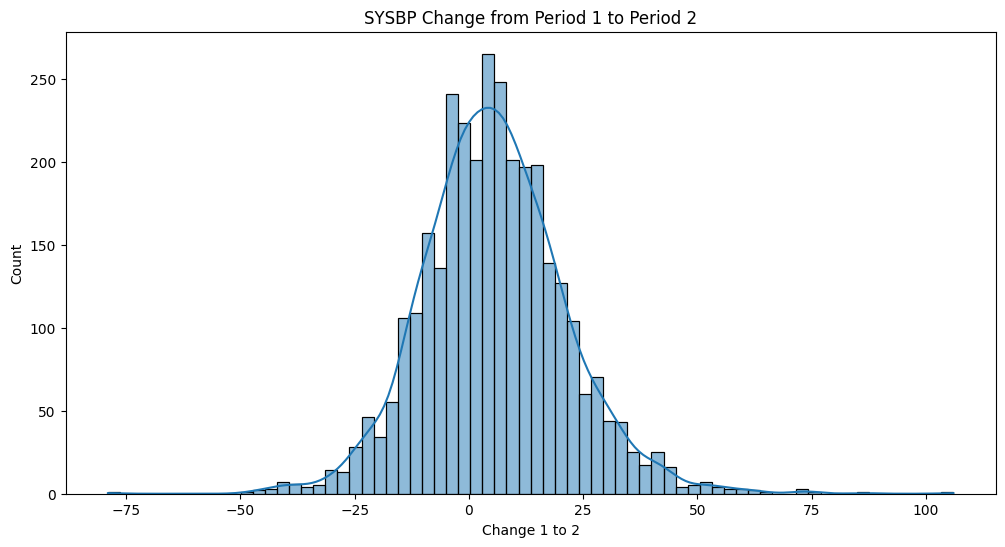

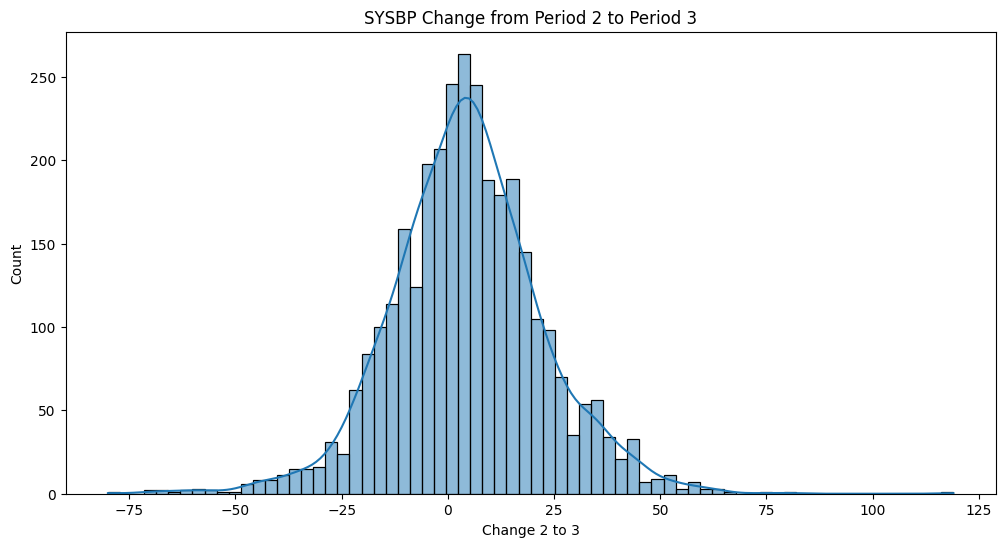

             RANDID  TOTCHOL Period 1  TOTCHOL Period 2  TOTCHOL Period 3  \
count  3.206000e+03       3206.000000       3206.000000       3206.000000   
mean   5.022454e+06        235.457953        249.647806        236.877139   
std    2.903083e+06         43.806844         44.201795         42.938028   
min    6.238000e+03        113.000000        115.000000        112.000000   
25%    2.503999e+06        205.000000        220.250000        208.000000   
50%    5.039256e+06        233.000000        244.500000        238.000000   
75%    7.487529e+06        261.000000        274.000000        261.000000   
max    9.999312e+06        696.000000        638.000000        625.000000   

       Change 1 to 2  Change 2 to 3  
count    3206.000000    3206.000000  
mean       14.189853     -12.770667  
std        32.666277      35.944672  
min      -159.000000    -368.000000  
25%        -4.750000     -34.000000  
50%        14.000000     -13.000000  
75%        33.000000       9.000000  
ma

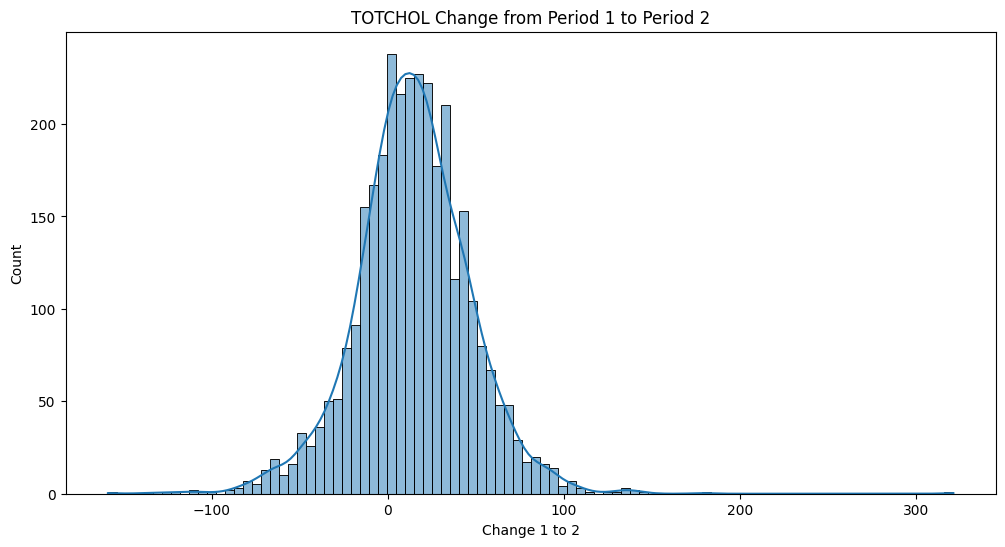

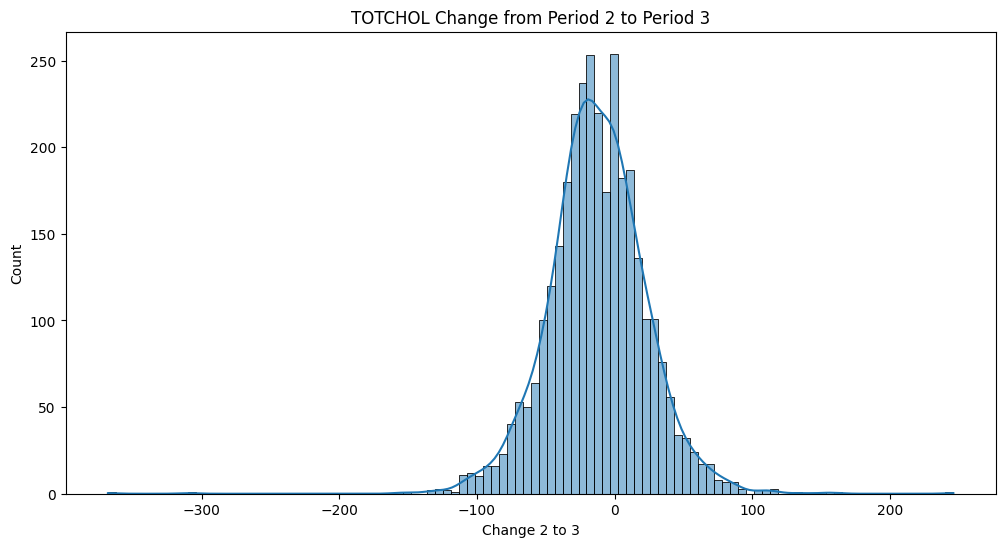

In [76]:
def analyze_variable_changes(variable):
    changes = []

    for name, group in grouped:
        group = group.sort_values(by='PERIOD')  # Ensure the records are sorted by PERIOD
        periods = group['PERIOD'].values
        values = group[variable].values

        if len(periods) == 3:  # Ensure there are 3 periods for the individual
            change_1_to_2 = values[1] - values[0]
            change_2_to_3 = values[2] - values[1]
            changes.append({
                'RANDID': name,
                f'{variable} Period 1': values[0],
                f'{variable} Period 2': values[1],
                f'{variable} Period 3': values[2],
                f'Change 1 to 2': change_1_to_2,
                f'Change 2 to 3': change_2_to_3
            })

    # Convert the results into a DataFrame
    changes_df = pd.DataFrame(changes)

    # Summary statistics
    summary_stats = changes_df.describe()
    print(summary_stats)

    # Visualize the changes
    plt.figure(figsize=(12, 6))
    sns.histplot(changes_df[f'Change 1 to 2'], kde=True)
    plt.title(f'{variable} Change from Period 1 to Period 2')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(changes_df[f'Change 2 to 3'], kde=True)
    plt.title(f'{variable} Change from Period 2 to Period 3')
    plt.show()

    return changes_df

# Analyze changes for specific variables
bmi_changes_df = analyze_variable_changes('BMI')
diabp_changes_df = analyze_variable_changes('DIABP')
sysbp_changes_df = analyze_variable_changes('SYSBP')
totchol_changes_df = analyze_variable_changes('TOTCHOL')


                       Change BMI 1 to 2  Change BMI 2 to 3  \
Change BMI 1 to 2               1.000000          -0.177917   
Change BMI 2 to 3              -0.177917           1.000000   
Change DIABP 1 to 2             0.203047           0.002739   
Change DIABP 2 to 3            -0.003935           0.204819   
Change SYSBP 1 to 2             0.153148          -0.066936   
Change SYSBP 2 to 3            -0.042495           0.161817   
Change TOTCHOL 1 to 2           0.169398           0.001999   
Change TOTCHOL 2 to 3          -0.004117           0.163654   
CVD Period 3                   -0.051014          -0.111382   

                       Change DIABP 1 to 2  Change DIABP 2 to 3  \
Change BMI 1 to 2                 0.203047            -0.003935   
Change BMI 2 to 3                 0.002739             0.204819   
Change DIABP 1 to 2               1.000000            -0.367246   
Change DIABP 2 to 3              -0.367246             1.000000   
Change SYSBP 1 to 2               

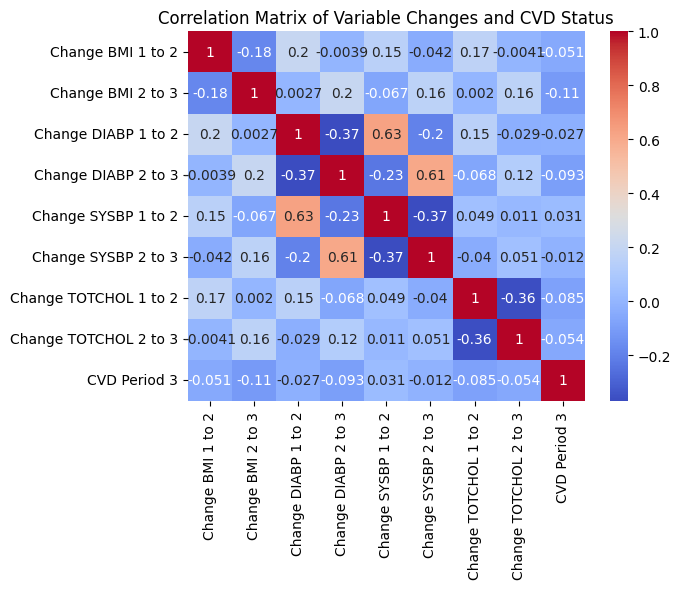

In [77]:
# Prepare data for correlation analysis
correlation_data = {
    'Change BMI 1 to 2': bmi_changes_df['Change 1 to 2'],
    'Change BMI 2 to 3': bmi_changes_df['Change 2 to 3'],
    'Change DIABP 1 to 2': diabp_changes_df['Change 1 to 2'],
    'Change DIABP 2 to 3': diabp_changes_df['Change 2 to 3'],
    'Change SYSBP 1 to 2': sysbp_changes_df['Change 1 to 2'],
    'Change SYSBP 2 to 3': sysbp_changes_df['Change 2 to 3'],
    'Change TOTCHOL 1 to 2': totchol_changes_df['Change 1 to 2'],
    'Change TOTCHOL 2 to 3': totchol_changes_df['Change 2 to 3'],
    'CVD Period 3': cvd_changes_df['CVD Period 3']
}

correlation_df = pd.DataFrame(correlation_data)
correlation_matrix = correlation_df.corr()

# Display the correlation matrix
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variable Changes and CVD Status')
plt.show()


              precision    recall  f1-score   support

           0       0.76      0.99      0.86       486
           1       0.00      0.00      0.00       156

    accuracy                           0.75       642
   macro avg       0.38      0.49      0.43       642
weighted avg       0.57      0.75      0.65       642

ROC AUC: 0.65


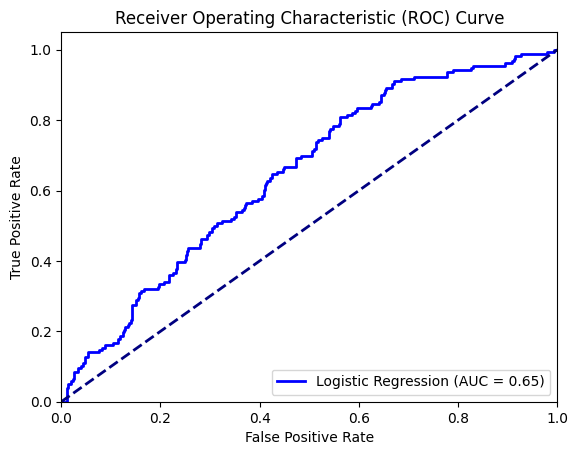

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import numpy as np

# Prepare the data for logistic regression
X = correlation_df.drop(columns=['CVD Period 3'])
y = correlation_df['CVD Period 3']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC: {roc_auc:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Implementing Improvements:
Resampling Techniques:

              precision    recall  f1-score   support

           0       0.60      0.61      0.60       487
           1       0.61      0.61      0.61       497

    accuracy                           0.61       984
   macro avg       0.61      0.61      0.61       984
weighted avg       0.61      0.61      0.61       984

ROC AUC: 0.64


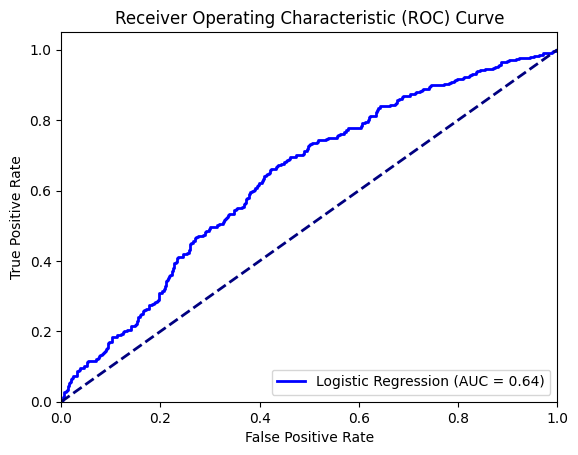

In [79]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the logistic regression model on the resampled data
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC: {roc_auc:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


              precision    recall  f1-score   support

           0       0.61      0.60      0.60       487
           1       0.61      0.62      0.61       497

    accuracy                           0.61       984
   macro avg       0.61      0.61      0.61       984
weighted avg       0.61      0.61      0.61       984

ROC AUC: 0.64


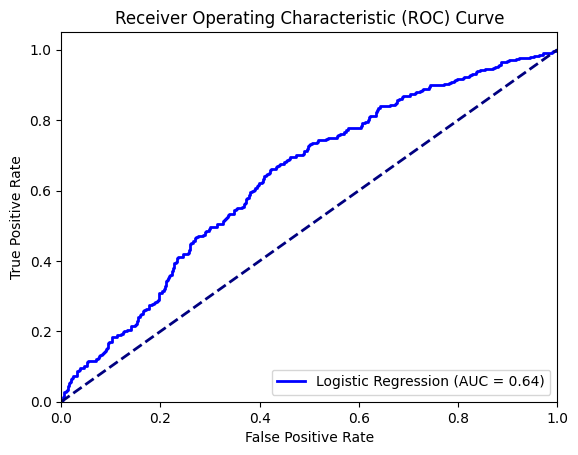

In [80]:
# Train the logistic regression model with class weights
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC: {roc_auc:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [40]:
data['AGE'].value_counts()

AGE
52    470
54    464
51    448
53    433
50    426
48    426
58    404
55    399
56    396
57    386
60    382
46    380
59    367
49    367
63    357
61    348
47    342
62    341
45    339
64    321
44    304
65    290
67    266
42    258
43    256
66    237
68    216
41    213
40    212
69    192
39    178
70    169
38    145
71    142
72    110
73    107
37     93
74     90
36     84
75     71
76     51
35     42
77     33
79     21
78     18
34     18
80      6
33      5
81      3
32      1
Name: count, dtype: int64

In [49]:
data['AGE','TOTCHOL'].hist(figsize=(10,6),bins=20)
plt.show()

KeyError: ('AGE', 'TOTCHOL')

In [ ]:
df_p3 = data[data['PERIOD'] == 3]
df_p3.shape

(3263, 39)

In [ ]:
# filling missing values with mean values
df_p3.fillna(df_p3.mean(), inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
# Prepare the data
X = df_p3.drop(columns=['CVD','TIMECVD','TIMECHD','TIMEMIFC','TIMEMI','TIMESTRK','TIMEAP','TIMEDTH','TIMEHYP',
                       'educ','RANDID','PERIOD','TIME'
                       ])
y = df_p3['CVD']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize models without XGBoost
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

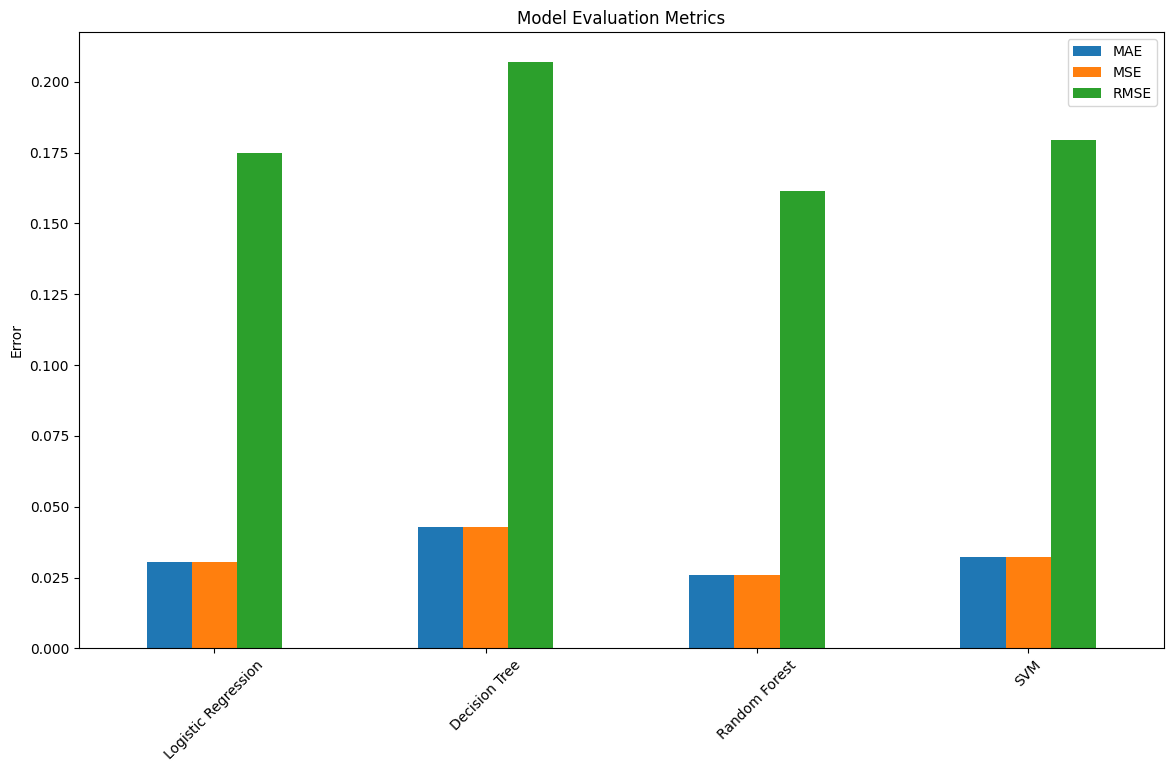

,MAE,MSE,RMSE
Logistic Regression,0.030628,0.030628,0.175008
Decision Tree,0.042879,0.042879,0.207072
Random Forest,0.026034,0.026034,0.161350
SVM,0.032159,0.032159,0.179330


In [ ]:
# Plotting the results
results_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Evaluation Metrics')
plt.ylabel('Error')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

results_df

**Analysis of the Results**

- Random Forest shows the best performance with the lowest error metrics across MAE, MSE, and RMSE, indicating it is the most accurate model among the four.
- Logistic Regression also performs well with low error metrics but is slightly less accurate than Random Forest.
- SVM has moderate error metrics, performing better than Decision Tree but worse than Logistic Regression and Random Forest.
- Decision Tree has the highest error metrics, suggesting it is the least effective model among the four in terms of prediction accuracy.

This comparison indicates that ensemble methods like Random Forest generally provide better performance due to their ability to reduce overfitting and capture complex patterns in the data.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Initialize the dictionary to store confusion matrices and accuracy scores
confusion_matrices = {}
accuracy_scores = {}

# Calculate confusion matrix and accuracy for each model
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_matrices[name] = cm
    accuracy_scores[name] = accuracy

confusion_matrices, accuracy_scores

({'Logistic Regression': array([[491,   8],
         [ 12, 142]]),
  'Decision Tree': array([[489,  10],
         [ 18, 136]]),
  'Random Forest': array([[493,   6],
         [ 11, 143]]),
  'SVM': array([[490,   9],
         [ 12, 142]])},
 {'Logistic Regression': 0.9693721286370597,
  'Decision Tree': 0.9571209800918836,
  'Random Forest': 0.9739663093415007,
  'SVM': 0.9678407350689127})

### **Analysis:**

**Logistic Regression:**

High accuracy (96.94%) with a low number of misclassifications. It has 8 false positives and 12 false negatives, indicating good performance in distinguishing between the classes.

**Decision Tree:**

Slightly lower accuracy (95.71%) compared to the other models. It has higher false positives (10) and false negatives (18), indicating that it may overfit to the training data and have lower generalization ability.

**Random Forest:**

Highest accuracy (97.40%) among the models with the lowest number of misclassifications. It has 6 false positives and 11 false negatives, showing it is the most effective model in this comparison.

**SVM:**

Good accuracy (96.78%), similar to Logistic Regression. It has 9 false positives and 12 false negatives, indicating good performance but slightly less effective than Random Forest.

### **Summary:**

- Random Forest is the best-performing model with the highest accuracy and the lowest number of misclassifications, demonstrating its robustness in handling the data.
- Logistic Regression and SVM also perform well with high accuracy and low misclassification rates.
- Decision Tree has the lowest accuracy and the highest number of misclassifications, suggesting it is the least effective model among the four in this scenario.

These results align with the error metrics provided earlier, reinforcing the conclusion that ensemble methods like Random Forest generally offer better performance and robustness.

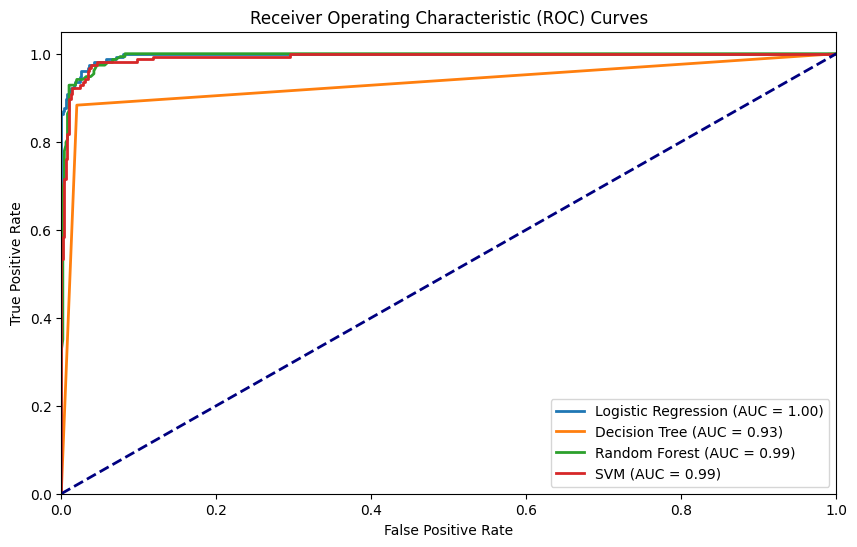

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each model
roc_data = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)

# Plotting the ROC curves
plt.figure(figsize=(10, 6))

for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


### **Considerations:**
1. Accuracy:

RF has a slightly higher accuracy (97.40%) compared to LR (96.94%). This indicates that RF is better at making correct predictions overall.

2. AUC:

LR has a perfect AUC of 1.00, indicating it ranks positive samples perfectly higher than negative ones across all thresholds. RF has an almost perfect AUC of 0.99, indicating very high performance but slightly less than LR.

3. Misclassifications:

RF has fewer misclassifications in terms of both false positives and false negatives compared to LR, which might be critical depending on the cost of these errors.

4. Model Complexity and Interpretability:

LR is generally simpler and more interpretable compared to RF. If model interpretability is crucial, LR might be preferred.
RF is more complex and can capture non-linear relationships better, which might lead to better performance in more complex datasets.

### **Decision Criteria:**
- Context and Application:

 - If the cost of misclassifications (FP and FN) is high, you might prefer the model with fewer misclassifications, which is RF.
 - If you need a model that is easily interpretable and you trust the perfect ranking indicated by the AUC, LR might be more suitable.

- Balance between Metrics:

 - Since both models perform exceptionally well but RF has a slight edge in accuracy and fewer misclassifications, it might be the better choice in terms of overall predictive performance.
 - However, LR's perfect AUC indicates it has a very strong ranking capability, which can be useful in applications where the probability estimates themselves are critical.

### **Conclusion:**
Given the slightly better accuracy and fewer misclassifications, Random Forest might be the better overall choice for predictive performance. However, if interpretability and perfect probability ranking are more important, you might consider Logistic Regression.

In many cases, it can also be beneficial to consider an ensemble approach or further validation on additional datasets to make a more informed decision.

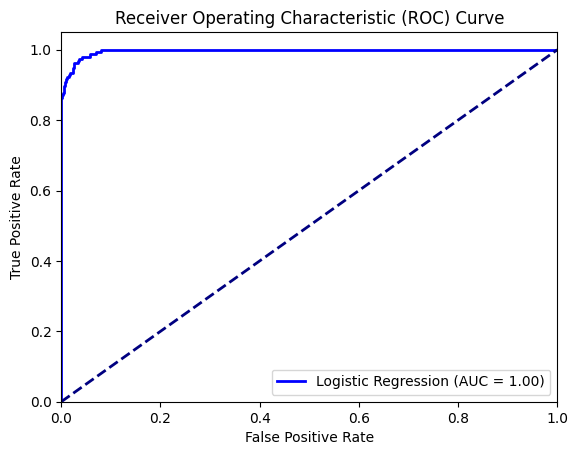

0.9966426359211931

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Ensure the models dictionary and test data are defined
# models = {'Logistic Regression': logistic_regression_model, ...}
# X_test_scaled and y_test should be your test data and labels

# Calculate ROC curve and AUC for Logistic Regression
model = models['Logistic Regression']
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Predicted probabilities

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

roc_auc  # Display the calculated AUC

In [ ]:
import numpy as np

# Get the predicted probabilities for the positive class
y_proba = models['Logistic Regression'].predict_proba(X_test_scaled)[:, 1]

# Combine the true labels and predicted probabilities into a single array
combined = np.vstack((y_test, y_proba)).T

# Sort the array based on the predicted probabilities
sorted_combined = combined[np.argsort(combined[:, 1])]

# Check the ordering of the true labels
print(sorted_combined)


[[0.00000000e+00 1.80013874e-04]
 [0.00000000e+00 2.14441279e-04]
 [0.00000000e+00 2.52755810e-04]
 ...
 [1.00000000e+00 9.99999990e-01]
 [1.00000000e+00 9.99999999e-01]
 [1.00000000e+00 9.99999999e-01]]


____________________________________________________________

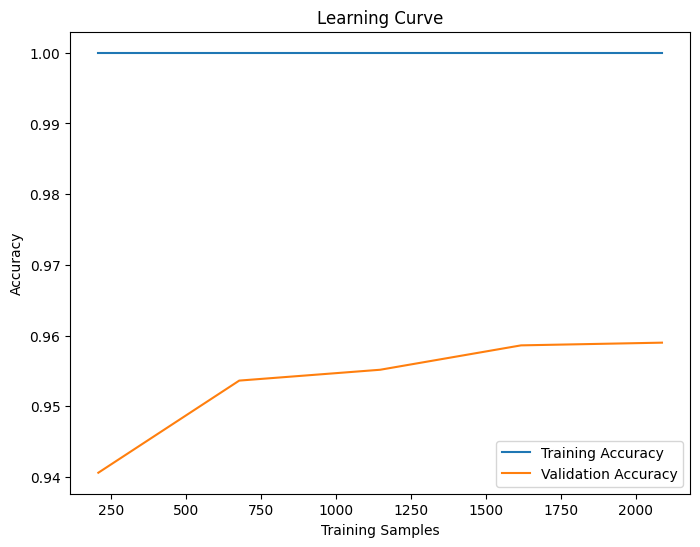

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy'
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_mean, label='Validation Accuracy')
    plt.xlabel('Training Samples')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

# Usage example:
plot_learning_curve(model, X_train, y_train, cv=5)


### Analysis:
- The gap between the training and validation accuracy lines suggests potential overfitting:
 - The model performs exceptionally well on the training data but less so on unseen data.
 - Overfitting occurs when the model captures noise or specific details unique to the training set.
- To address overfitting:
 - Consider using regularization techniques (e.g., L1, L2 regularization).
 - Collect more diverse training data.
 - Simplify the model architecture if it’s too complex.

Remember, a balanced learning curve with both training and validation accuracy converging to a reasonable level indicates good generalization.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model with L1 regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)

# Train the model on your data (X_train, y_train)
model_l1.fit(X_train, y_train)

# Evaluate the model on test data
y_pred_l1 = model_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f"Accuracy (L1 Regularization): {accuracy_l1:.4f}")


Accuracy (L1 Regularization): 0.9694


In [ ]:
# Create a logistic regression model with L2 regularization
model_l2 = LogisticRegression(penalty='l2', C=0.1)

# Train the model
model_l2.fit(X_train, y_train)

# Evaluate on test data
y_pred_l2 = model_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print(f"Accuracy (L2 Regularization): {accuracy_l2:.4f}")

Accuracy (L2 Regularization): 0.8836


1. **L1 Regularization (Lasso):**
 - Accuracy (L1 Regularization): 0.9694
 - L1 regularization encourages sparse coefficients (some become exactly zero).
 - The high accuracy suggests that the model performs well on both training and validation data.
 - Sparse coefficients indicate that some features are more important than others.
2. **L2 Regularization (Ridge):**
 - Accuracy (L2 Regularization): 0.8836
 - L2 regularization discourages large coefficients.
 - The slightly lower accuracy suggests that the model may be less prone to overfitting.
 - L2 regularization results in smoother coefficients.

In summary, L1 regularization (Lasso) achieved higher accuracy, but L2 regularization (Ridge) provides better generalization by preventing overfitting. You can choose based on your specific trade-offs between sparsity and smoothness!

Now that we’ve applied L1 and L2 regularization to your logistic regression model, here are the next steps to find the best solution:

1. Hyperparameter Tuning:
Experiment with different hyperparameters (e.g., regularization strength, learning rate) to optimize model performance.
Use techniques like grid search or random search to find the best combination.
2. Cross-Validation:
Perform k-fold cross-validation to assess model performance more robustly.
Split your data into k subsets (folds), train on k-1 folds, and validate on the remaining fold.
Compute average metrics (e.g., accuracy, F1-score) across all folds.
3. Feature Engineering:
Explore feature engineering techniques:
Create new features.
Remove irrelevant or redundant features.
Transform existing features (e.g., scaling, encoding).
4. Model Selection:
Consider other algorithms (e.g., decision trees, random forests, support vector machines).
Compare their performance using cross-validation.
5. Evaluate Metrics:
Look beyond accuracy:
Precision, recall, F1-score for imbalanced datasets.
ROC curve and AUC for binary classification.
Mean absolute error (MAE) or mean squared error (MSE) for regression.
Ensemble Methods:
Combine multiple models (e.g., bagging, boosting, stacking) for better performance.
Random Forests and Gradient Boosting are popular ensemble techniques.

Remember to iterate, experiment, and fine-tune until we achieve the best solution for our specific problem!

1. Hyperparameter Tuning:
 - Use grid search to find the best hyperparameters.
 - Example with logistic regression:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a pipeline with StandardScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

# Print a success message
print("Pipeline with StandardScaler and LogisticRegression is created successfully.")

Pipeline with StandardScaler and LogisticRegression is created successfully.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a pipeline with StandardScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

# Define hyperparameters to search
param_grid = {
    'clf__penalty': ['l1', 'l2'],
    'clf__C': [0.01, 0.1, 1.0, 10.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'clf__C': 0.1, 'clf__penalty': 'l2'}


**2. Cross-Validation:**
Evaluate the model using cross-validation:

In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluate the model on training data using cross-validation
cross_val_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Score: {cross_val_scores.mean()}")

Cross-Validation Scores: [0.96934866 0.96168582 0.97318008 0.96934866 0.97509579]
Mean Cross-Validation Score: 0.9697318007662833


**3. Feature Engineering:**
Explore feature engineering techniques (e.g., create new features, remove irrelevant ones).

**4. Model Selection:**
Consider other algorithms (e.g., Random Forests, Gradient Boosting).

**5. Evaluate Metrics:**
Evaluate on test data using the best model:

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test data
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate accuracy and other metrics
print(f"Accuracy on Test Data: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy on Test Data: 0.8744257274119449
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       499
           1       0.87      0.55      0.67       154

    accuracy                           0.87       653
   macro avg       0.87      0.76      0.80       653
weighted avg       0.87      0.87      0.86       653



**Model Tuning**

Hyperparameter Tuning: Use techniques like Grid Search or Random Search with cross-validation to find the best hyperparameters for your models.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 30, 50],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

**Advanced Algorithms**

Ensemble Methods: Use ensemble techniques like boosting (e.g., XGBoost, LightGBM) or stacking multiple models to improve performance.

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

**Cross-Validation**

Use Cross-Validation: Employ k-fold cross-validation to ensure the model's robustness and avoid overfitting. This helps in assessing the model's performance more reliably.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(scores.mean())


0.9641414331213184


**Address Class Imbalance**

Class Weights: If there is class imbalance, use class weights to give more importance to the minority class.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

Resampling Techniques: Use oversampling (e.g., SMOTE) or undersampling to balance the classes in the training data.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


**Model Evaluation and Monitoring**

- Evaluate Model on Different Metrics: Besides accuracy, use metrics like precision, recall, F1-score, and AUC-ROC to get a comprehensive understanding of model performance.

- Monitor Model Performance: Continuously monitor the model's performance on new data and retrain as necessary.

Example: Improving Random Forest with Hyperparameter Tuning and SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and model evaluation
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate on test data
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy:.4f}')


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9725


To further improve the model performance beyond hyperparameter tuning and resampling, you can explore the following advanced strategies:

**Feature Engineering**

Polynomial Features: Generate polynomial and interaction features to capture non-linear relationships.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


Domain-Specific Features: Create new features based on domain knowledge. For example, calculating ratios, or aggregating related features.

**Model Stacking/Blending**

Stacking: Combine predictions from multiple models to improve performance. This involves training a meta-model on the predictions of base models.

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('lr', LogisticRegression(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_model.fit(X_train_scaled, y_train)


StackingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression())

**Advanced Ensemble Methods**

Gradient Boosting: Implement and tune gradient boosting models such as XGBoost or LightGBM with hyperparameter tuning.

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {xgb_accuracy:.4f}')


XGBoost Accuracy: 0.9665


**Regularization Techniques**

Regularization: Use L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting and improve generalization.

In [ ]:
from sklearn.linear_model import LogisticRegression

l1_model = LogisticRegression(penalty='l1', solver='saga', random_state=42)
l1_model.fit(X_train_scaled, y_train)


LogisticRegression(penalty='l1', random_state=42, solver='saga')

**Neural Networks**

Deep Learning: Implement a neural network model using frameworks like TensorFlow or PyTorch.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=10, validation_split=0.1)


Epoch 1/50
1257/1257 [==============================] - 3s 2ms/step - loss: 0.1126 - accuracy: 0.9553 - val_loss: 0.0825 - val_accuracy: 0.9735
Epoch 2/50
1257/1257 [==============================] - 2s 2ms/step - loss: 0.0693 - accuracy: 0.9710 - val_loss: 0.0566 - val_accuracy: 0.9885
Epoch 3/50
1257/1257 [==============================] - 2s 2ms/step - loss: 0.0633 - accuracy: 0.9728 - val_loss: 0.0537 - val_accuracy: 0.9857
Epoch 4/50
1257/1257 [==============================] - 2s 2ms/step - loss: 0.0608 - accuracy: 0.9752 - val_loss: 0.0427 - val_accuracy: 0.9928
Epoch 5/50
1257/1257 [==============================] - 2s 2ms/step - loss: 0.0564 - accuracy: 0.9776 - val_loss: 0.0490 - val_accuracy: 0.9878
Epoch 6/50
1257/1257 [==============================] - 2s 2ms/step - loss: 0.0536 - accuracy: 0.9776 - val_loss: 0.0479 - val_accuracy: 0.9871
Epoch 7/50
1257/1257 [==============================] - 2s 2ms/step - loss: 0.0501 - accuracy: 0.9793 - val_loss: 0.0530 - val_accuracy:

In [ ]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                1728      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3841 (15.00 KB)
Trainable params: 3841 (15.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


**Example: Combining Multiple Strategies**

Here's an example of combining polynomial features with stacking and XGBoost:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Define base models for stacking
estimators = [
    ('lr', LogisticRegression(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Stacking Classifier
stack_model = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier(random_state=42))
stack_model.fit(X_train_poly, y_train)

# Evaluate the stacking model
y_pred_stack = stack_model.predict(X_test_poly)
stack_accuracy = accuracy_score(y_test, y_pred_stack)
print(f'Stacking Model Accuracy: {stack_accuracy:.4f}')


Stacking Model Accuracy: 0.9703


In [ ]:
data.shape

(11627, 39)

In [ ]:
data.isnull().sum()

RANDID      0
SEX         0
TOTCHOL     0
AGE         0
SYSBP       0
DIABP       0
CURSMOKE    0
CIGPDAY     0
BMI         0
DIABETES    0
BPMEDS      0
HEARTRTE    0
GLUCOSE     0
educ        0
PREVCHD     0
PREVAP      0
PREVMI      0
PREVSTRK    0
PREVHYP     0
TIME        0
PERIOD      0
HDLC        0
LDLC        0
DEATH       0
ANGINA      0
HOSPMI      0
MI_FCHD     0
ANYCHD      0
STROKE      0
CVD         0
HYPERTEN    0
TIMEAP      0
TIMEMI      0
TIMEMIFC    0
TIMECHD     0
TIMESTRK    0
TIMECVD     0
TIMEDTH     0
TIMEHYP     0
dtype: int64

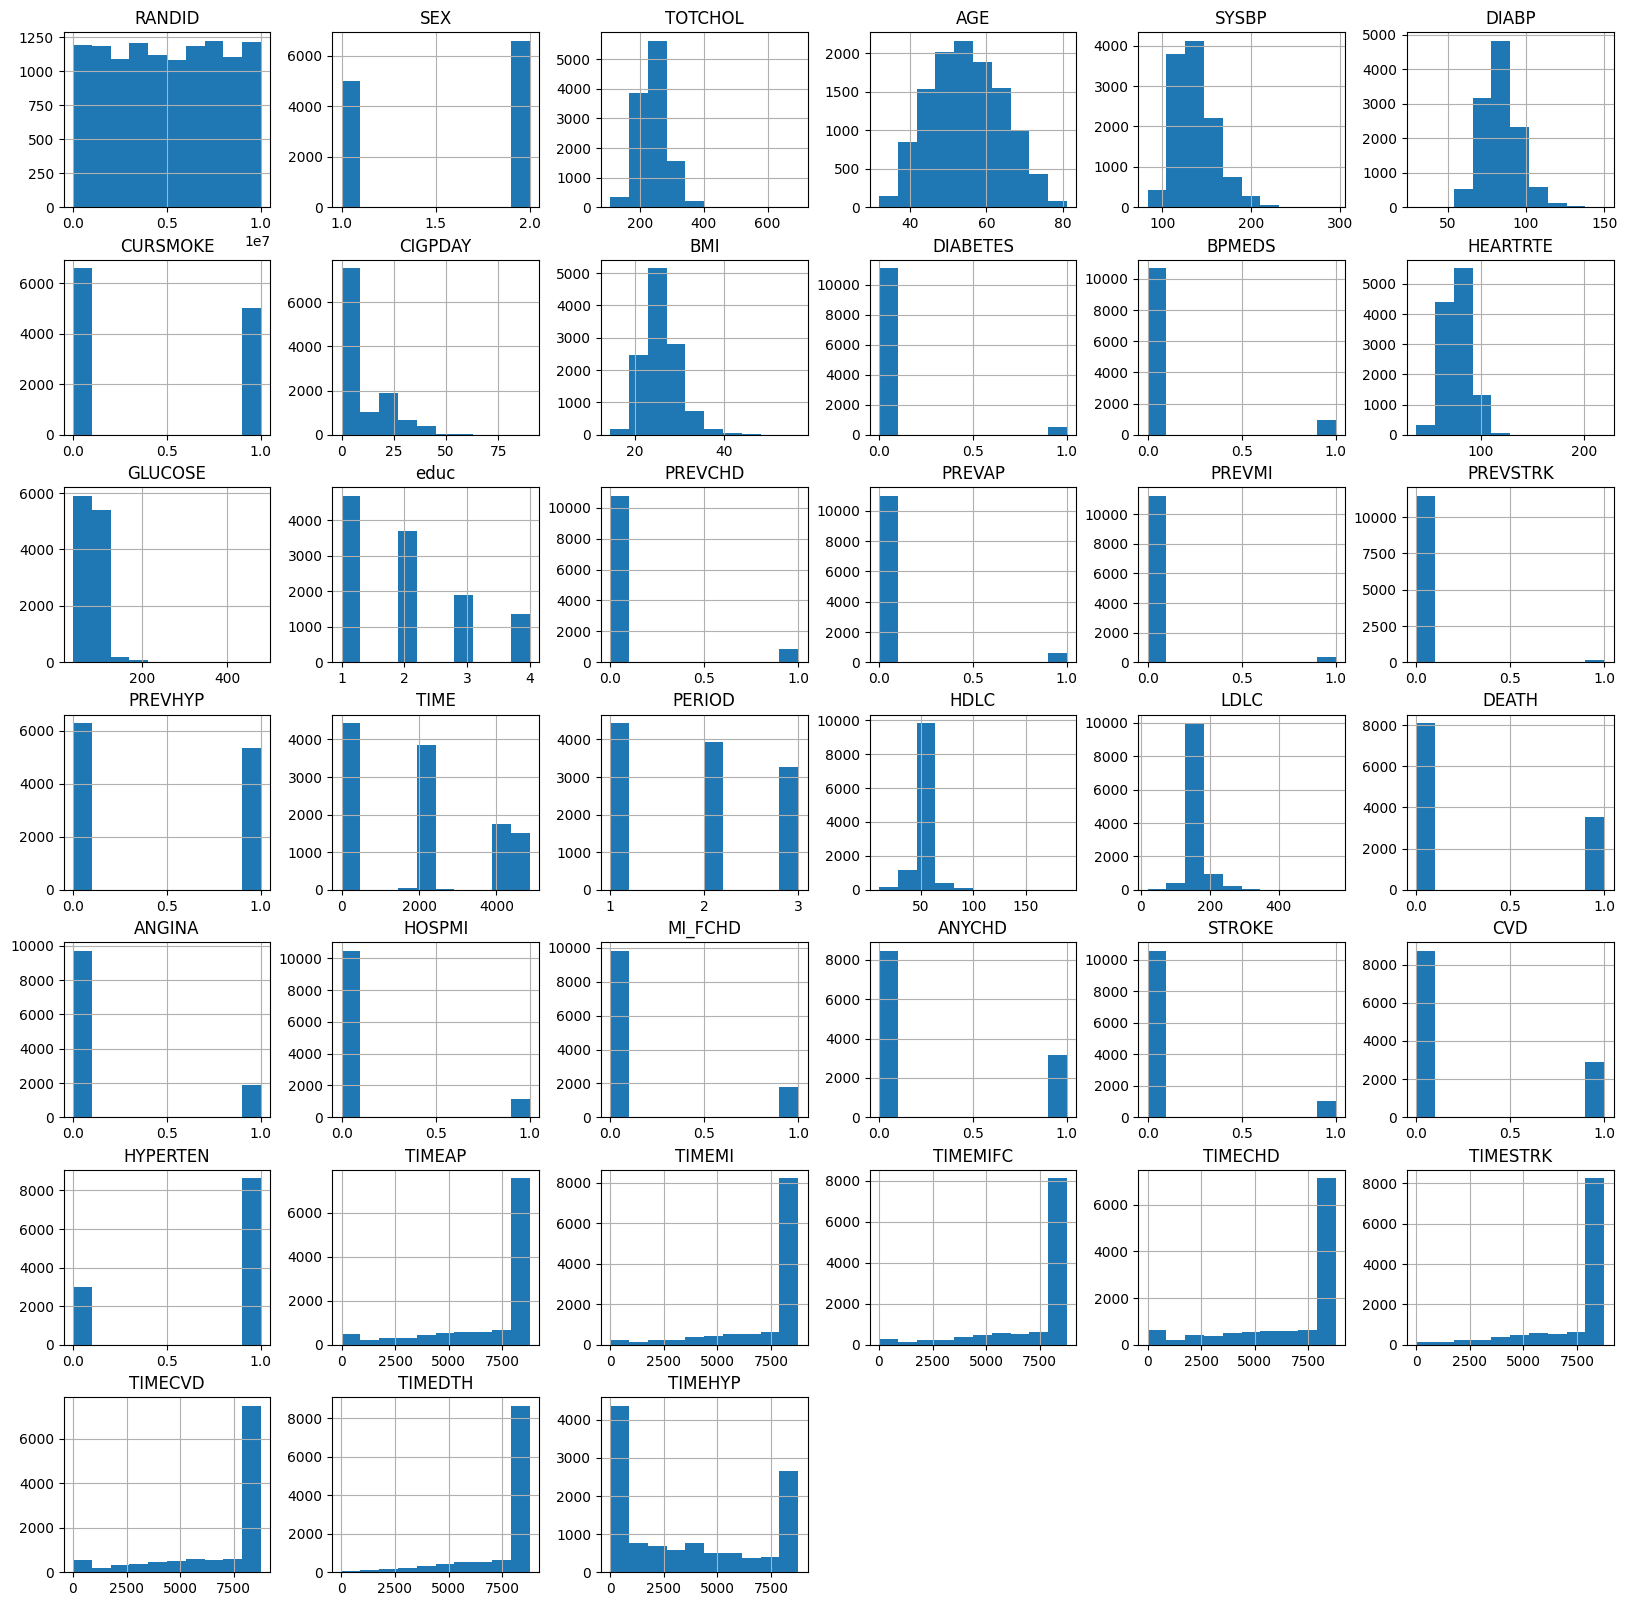

In [ ]:
data.hist(figsize=(20,20))
plt.show()

### **Building and Training the Neural Network**
Now that we have our data fully processed and split into training and testing datasets, we can begin building a neural network to solve this classification problem. Using keras, we will define a simple neural network with one hidden layer. Since this is a categorical classification problem, we will use a softmax activation function in the final layer of our network and a categorical_crossentropy loss during our training phase.

In [ ]:
data.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.970000,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,25.877349,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.730000,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.430000,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.500000,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [ ]:
X.shape

(11627, 28)

In [ ]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 112       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 153 (612.00 Byte)
Trainable params: 153 (612.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# fit the binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

NameError: name 'Y_train_binary' is not defined

In [ ]:
(765/2498)*100

30.624499599679744

In [ ]:
df_p3.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
1,2448,1,209.000000,52,121.0,66.0,0,0.0,25.894781,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
4,6238,2,237.000000,58,108.0,66.0,0,0.0,28.500000,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
11,11252,2,236.713349,58,155.0,90.0,1,30.0,24.610000,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,4285
14,11263,2,220.000000,55,180.0,106.0,0,0.0,31.170000,1,...,1,1,8766,8766,5719,5719,8766,5719,8766,0
19,12806,2,320.000000,57,110.0,46.0,1,30.0,22.020000,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,8679


In [ ]:
df_p3.describe()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,3.263000e+03,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,...,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000
mean,5.028933e+06,1.574931,236.713349,60.648177,140.215752,81.792982,0.343549,6.771622,25.894781,0.077842,...,0.234447,0.752069,7678.690469,8034.801716,7988.031566,7445.919093,8104.207478,7609.054551,8286.022985,3834.505057
std,2.901817e+06,0.494429,42.966720,8.296766,22.927642,11.271432,0.474965,11.604648,4.070008,0.267965,...,0.423718,0.431878,2058.407735,1589.872706,1662.139575,2279.218462,1392.096645,2134.317113,1045.518300,3476.472360
min,2.448000e+03,1.000000,112.000000,44.000000,86.000000,30.000000,0.000000,0.000000,14.430000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4182.000000,0.000000
25%,2.509944e+06,1.000000,208.000000,54.000000,123.000000,74.000000,0.000000,0.000000,23.215000,0.000000,...,0.000000,1.000000,7359.500000,8294.500000,8176.000000,6731.500000,8324.000000,7161.000000,8766.000000,0.000000
50%,5.050572e+06,2.000000,236.713349,60.000000,137.000000,80.000000,0.000000,0.000000,25.500000,0.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,2941.000000
75%,7.501310e+06,2.000000,261.000000,67.000000,154.000000,89.000000,1.000000,10.000000,28.040000,0.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,7683.500000
max,9.999312e+06,2.000000,625.000000,81.000000,267.000000,130.000000,1.000000,80.000000,56.800000,1.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Sample data preparation
X = df_p3.drop(columns=['CVD'])
y = df_p3['CVD']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
base_models = [
    ('lr', LogisticRegression(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Initialize meta-model
meta_model = XGBClassifier(random_state=42)

# Create the StackingClassifier
stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking model
stack_model.fit(X_train, y_train)

# Make predictions
y_pred = stack_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Stacking Model Accuracy: {accuracy:.4f}')


Stacking Model Accuracy: 0.9954


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Sample data preparation
X = df_p3.drop(columns=['CVD'])
y = df_p3['CVD']

# Train-test split with a fixed random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models with consistent parameters
base_models = [
    ('lr', LogisticRegression(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Initialize meta-model
meta_model = XGBClassifier(random_state=42)

# Create the StackingClassifier
stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking model
stack_model.fit(X_train, y_train)

# Make predictions
y_pred = stack_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Stacking Model Accuracy: {accuracy:.4f}')

# Optional: Hyperparameter tuning for the meta-model
param_grid = {
    'final_estimator__n_estimators': [50, 100, 200],
    'final_estimator__max_depth': [3, 5, 10],
    'final_estimator__learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(stack_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model evaluation
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the tuned stacking model
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Best Stacking Model Accuracy: {best_accuracy:.4f}')
print(f'Best Parameters: {best_params}')


Stacking Model Accuracy: 0.9969
Best Stacking Model Accuracy: 0.9985
Best Parameters: {'final_estimator__learning_rate': 0.1, 'final_estimator__max_depth': 3, 'final_estimator__n_estimators': 100}
